# MODULE 4 - FINAL PROJECT
\
**Student name:** Neha Patel\
**Student pace:** part time\
**Scheduled project review date/time:** \
**Instructor name:** James Irving

# Business Case

# Methodology

# Importing Necessary Libraries

In [ ]:
# !pip install tensorboard
# !pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pylab import rcParams
import seaborn as sns
import itertools
import statsmodels.api as sm
import missingno as ms
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
# import warnings 
# warnings.filterwarnings('ignore')
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
import pmdarima as pm

# The Data Set

In [2]:
df = pd.read_excel('Mod_4_proj_data.xlsx')
df

Month  Total Renewable Energy Production  \
0   1973-01-01                            403.981   
1   1973-02-01                            360.900   
2   1973-03-01                            400.161   
3   1973-04-01                            380.470   
4   1973-05-01                            392.141   
..         ...                                ...   
566 2020-03-01                            995.023   
567 2020-04-01                            919.439   
568 2020-05-01                           1040.212   
569 2020-06-01                           1060.066   
570 2020-07-01                           1003.547   

     Hydroelectric Power Consumption  Geothermal Energy Consumption  \
0                            272.703                          1.491   
1                            242.199                          1.363   
2                            268.810                          1.412   
3                            253.185                          1.649   
4                            260.770                          1.537   
..                               ...                            ...   
566                          202.739                         18.946   
567                          189.099                         17.553   
568                          268.273                         18.312   
569                          260.567                         17.424   
570                          236.338                         18.571   

    Solar Energy Consumption Wind Energy Consumption  Wood Energy Consumption  \
0              Not Available           Not Available                  129.630   
1              Not Available           Not Available                  117.194   
2              Not Available           Not Available                  129.763   
3              Not Available           Not Available                  125.462   
4              Not Available           Not Available                  129.624   
..                       ...                     ...                      ...   
566                   94.035                 268.416                  179.141   
567                  113.675                 268.881                  173.630   
568                  134.061                 256.554                  182.582   
569                  131.784                 274.458                  169.606   
570                  140.897                 206.661                  176.805   

     Waste Energy Consumption Biofuels Consumption  \
0                       0.157        Not Available   
1                       0.144        Not Available   
2                       0.176        Not Available   
3                       0.174        Not Available   
4                       0.210        Not Available   
..                        ...                  ...   
566                    38.061              162.492   
567                    35.323              112.394   
568                    35.810              145.906   
569                    32.542              166.727   
570                    34.490              179.397   

     Total Biomass Energy Consumption  Total Renewable Energy Consumption  
0                             129.787                             403.981  
1                             117.338                             360.900  
2                             129.938                             400.161  
3                             125.636                             380.470  
4                             129.834                             392.141  
..                                ...                                 ...  
566                           379.693                             963.830  
567                           321.348                             910.557  
568                           364.299                            1041.498  
569                           368.875                            1053.109  
570                           390.692                        

In [3]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index(df['Month'],inplace = True)
df.drop('Month',axis=1,inplace=True)
df

Total Renewable Energy Production  \
Month                                           
1973-01-01                            403.981   
1973-02-01                            360.900   
1973-03-01                            400.161   
1973-04-01                            380.470   
1973-05-01                            392.141   
...                                       ...   
2020-03-01                            995.023   
2020-04-01                            919.439   
2020-05-01                           1040.212   
2020-06-01                           1060.066   
2020-07-01                           1003.547   

            Hydroelectric Power Consumption  Geothermal Energy Consumption  \
Month                                                                        
1973-01-01                          272.703                          1.491   
1973-02-01                          242.199                          1.363   
1973-03-01                          268.810                          1.412   
1973-04-01                          253.185                          1.649   
1973-05-01                          260.770                          1.537   
...                                     ...                            ...   
2020-03-01                          202.739                         18.946   
2020-04-01                          189.099                         17.553   
2020-05-01                          268.273                         18.312   
2020-06-01                          260.567                         17.424   
2020-07-01                          236.338                         18.571   

           Solar Energy Consumption Wind Energy Consumption  \
Month                                                         
1973-01-01            Not Available           Not Available   
1973-02-01            Not Available           Not Available   
1973-03-01            Not Available           Not Available   
1973-04-01            Not Available           Not Available   
1973-05-01            Not Available           Not Available   
...                             ...                     ...   
2020-03-01                   94.035                 268.416   
2020-04-01                  113.675                 268.881   
2020-05-01                  134.061                 256.554   
2020-06-01                  131.784                 274.458   
2020-07-01                  140.897                 206.661   

            Wood Energy Consumption  Waste Energy Consumption  \
Month                                                           
1973-01-01                  129.630                     0.157   
1973-02-01                  117.194                     0.144   
1973-03-01                  129.763                     0.176   
1973-04-01                  125.462                     0.174   
1973-05-01                  129.624                     0.210   
...                             ...                       ...   
2020-03-01                  179.141                    38.061   
2020-04-01                  173.630                    35.323   
2020-05-01                  182.582                    35.810   
2020-06-01                  169.606                    32.542   
2020-07-01                  176.805                    34.490   

           Biofuels Consumption  Total Biomass Energy Consumption  \
Month                                                               
1973-01-01        Not Available                           129.787   
1973-02-01        Not Available                           117.338   
1973-03-01        Not Available                           129.938   
1973-04-01        Not Available                           125.636   
1973-05-01        Not Available                           129.834   
...                         ...                               ...   
2020-03-01              162.492                           379.693   
2020-04-01              112.394                           321.348   
202

In [4]:
df_hyele = pd.DataFrame(df['Hydroelectric Power Consumption'])
df_geo = pd.DataFrame(df['Geothermal Energy Consumption'])
df_solar = pd.DataFrame(df['Solar Energy Consumption'])
df_wind = pd.DataFrame(df['Wind Energy Consumption'])
df_wood = pd.DataFrame(df['Wood Energy Consumption'])

# Hydroelectric Power Consumption

## Data Exploration

In [5]:
df_hyele

Hydroelectric Power Consumption
Month                                      
1973-01-01                          272.703
1973-02-01                          242.199
1973-03-01                          268.810
1973-04-01                          253.185
1973-05-01                          260.770
...                                     ...
2020-03-01                          202.739
2020-04-01                          189.099
2020-05-01                          268.273
2020-06-01                          260.567
2020-07-01                          236.338

[571 rows x 1 columns]

In [6]:
df_hyele.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Month', length=571, freq=None)

In [7]:
df_hyele=df_hyele['Hydroelectric Power Consumption'].resample('MS').mean()

In [8]:
df_hyele.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Month', length=571, freq='MS')

In [9]:
df_hyele.isna().sum()

0

<AxesSubplot:xlabel='Month'>

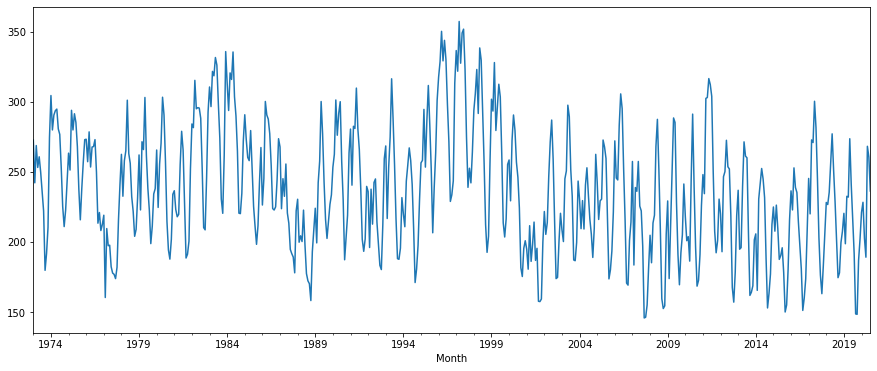

In [10]:
df_hyele.plot(figsize=(15,6))

In [15]:
df_hyele_train,df_hyele_test = df_hyele[:456],df_hyele[456:]

## Base Model

In [11]:
# p_h = d_h = q_h = range(0,2)
# pdq_h = list(itertools.product(p_h,d_h,q_h))
# pdqs_h = [(x[0],x[1],x[2],60) for x in pdq_h]

In [38]:
# ans_h = []
# for comb in pdq_h:
#     for combs in pdqs_h:
#         try:
#             mod_h = sm.tsa.statespace.SARIMAX(df_hyele, order = comb, seasonal_order=combs,
#                                              enforce_stationarity=False, enforce_invertibility=False)
#             output_h = mod_h.fit()
#             ans_h.append([comb,combs,output_h.aic])
#         except:
#             continue

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided

<AxesSubplot:>

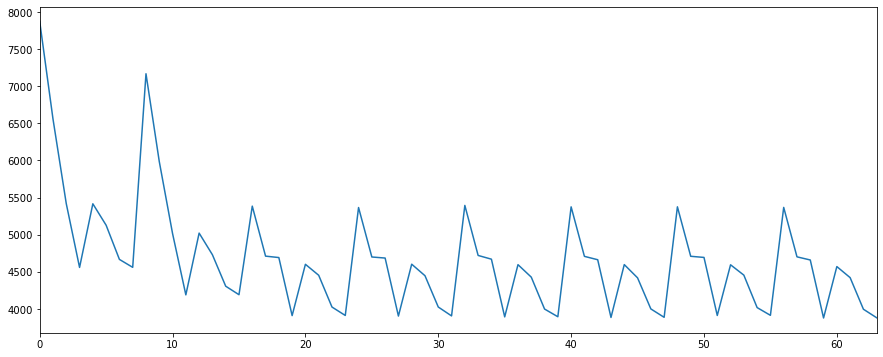

In [39]:
# ans_h_df=pd.DataFrame(ans_h, columns=['pdq','pdqs','AIC'])
# ans_h_df.AIC.plot(figsize=(15,6))

In [40]:
# ans_h_df.loc[ans_h_df['AIC'].idxmin]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 60)
AIC            3878.8
Name: 59, dtype: object

In [41]:
# arima_h = sm.tsa.statespace.SARIMAX(df_hyele, order = (1,1,1), seasonal_order=(0,1,1,60),
#                                     enforce_stationarity=False, enforce_invertibility=False)
# output_h = arima_h.fit()
# print(output_h.summary().tables[1])

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8502      0.030     27.977      0.000       0.791       0.910
ma.L1         -0.9881      0.013    -78.863      0.000      -1.013      -0.964
ma.S.L60      -1.0000    347.294     -0.003      0.998    -681.683     679.683
sigma2       268.1163   9.31e+04      0.003      0.998   -1.82e+05    1.83e+05


In [42]:
# pdqs_h_2 = [(x[0],x[1],x[2],12) for x in pdq_h]
# ans_h_2 = []
# for comb in pdq_h:
#     for combs in pdqs_h_2:
#         try:
#             mod_h_2 = sm.tsa.statespace.SARIMAX(df_hyele, order = comb, seasonal_order=combs,
#                                              enforce_stationarity=False, enforce_invertibility=False)
#             output_h_2 = mod_h.fit()
#             ans_h_2.append([comb,combs,output_h_2.aic])
#         except:
#             continue

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided

<AxesSubplot:>

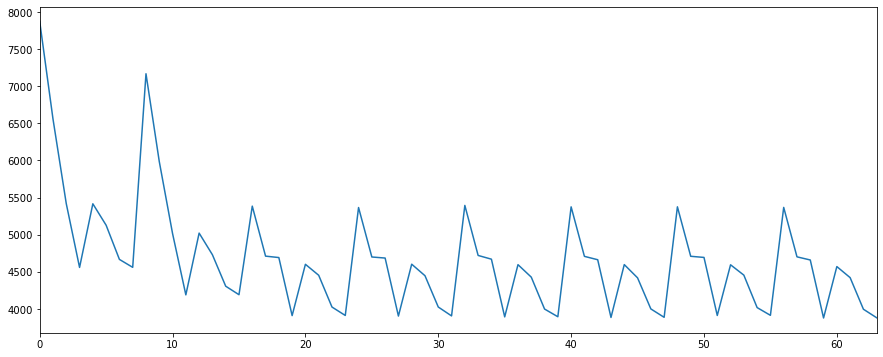

In [43]:
# ans_h_df_2=pd.DataFrame(ans_h_2, columns=['pdq','pdqs','AIC'])
# ans_h_df.AIC.plot(figsize=(15,6))

In [44]:
# ans_h_df_2.loc[ans_h_df_2['AIC'].idxmin]

pdq         (0, 0, 0)
pdqs    (0, 0, 0, 12)
AIC           3881.45
Name: 0, dtype: object

In [45]:
# arima_h_2 = sm.tsa.statespace.SARIMAX(df_hyele, order = (0,0,0), seasonal_order=(0,0,0,12),
#                                     enforce_stationarity=False, enforce_invertibility=False)
# output_h_2 = arima_h.fit()
# print(output_h_2.summary().tables[1])

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8502      0.030     27.977      0.000       0.791       0.910
ma.L1         -0.9881      0.013    -78.863      0.000      -1.013      -0.964
ma.S.L60      -1.0000    347.294     -0.003      0.998    -681.683     679.683
sigma2       268.1163   9.31e+04      0.003      0.998   -1.82e+05    1.83e+05


## Tuning p,d,q,s

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

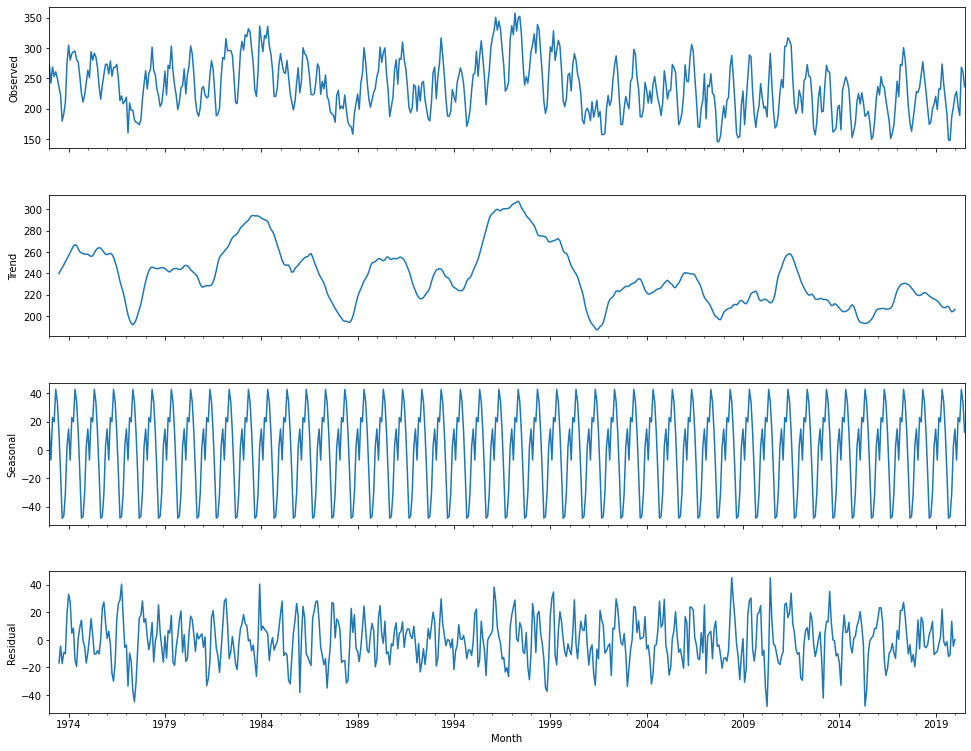

In [8]:
fig = plt.figure()  
fig = seasonal_decompose(df_hyele['Hydroelectric Power Consumption']).plot()  
fig.set_size_inches(15, 12)

In [13]:
def seasonal_decomp(series):
    fig = plt.figure()  
    fig = seasonal_decompose(series).plot()  
    fig.set_size_inches(15, 12)

In [14]:
def test_stationarity(series, window, cutoff):
    rolmean = series.rolling(window).mean()
    rolstd = series.rolling(window).std()
    
    fig = plt.figure(figsize = (12,8))
    ori = plt.plot(series, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    
    print('Dicky-Fuller Test:')
    dftest = adfuller(series)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','#Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}']=value
    if dfoutput['p-value']<cutoff:
        print('The Series is likely Stattionary')
    else:
        print('The Series is likely Non-Stationary')
    print(dfoutput)
    

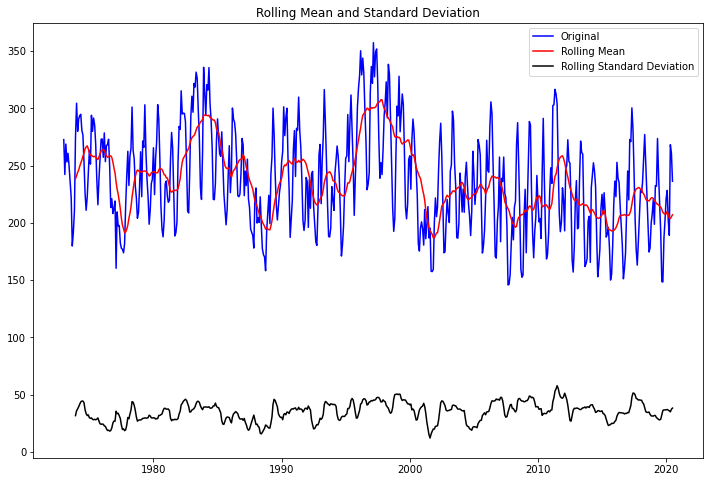

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic         -4.132805
p-value                 0.000854
#Lags Used             14.000000
#Observations Used    556.000000
Critical Value 1%      -3.442166
Critical Value 5%      -2.866752
Critical Value 10%     -2.569546
dtype: float64


In [11]:
test_stationarity(df_hyele['Hydroelectric Power Consumption'],12,0.05)

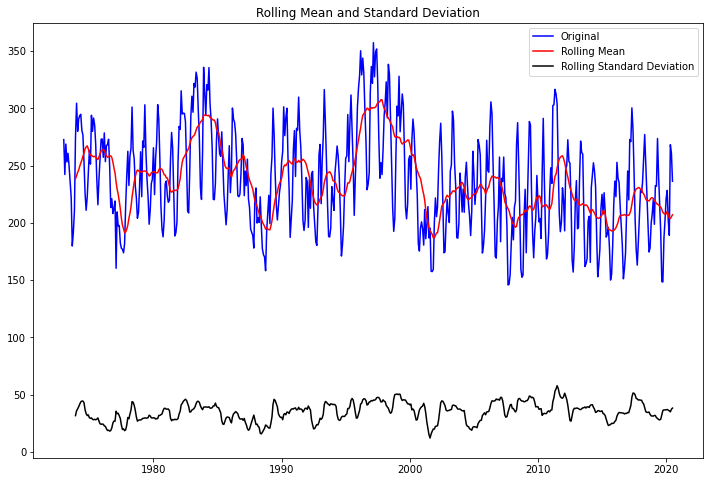

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic         -4.132805
p-value                 0.000854
#Lags Used             14.000000
#Observations Used    556.000000
Critical Value 1%      -3.442166
Critical Value 5%      -2.866752
Critical Value 10%     -2.569546
dtype: float64


In [12]:
test_stationarity(df_hyele['Hydroelectric Power Consumption'],12,0.01)

Therefore no further differencing to find out p parameter for ARIMA.

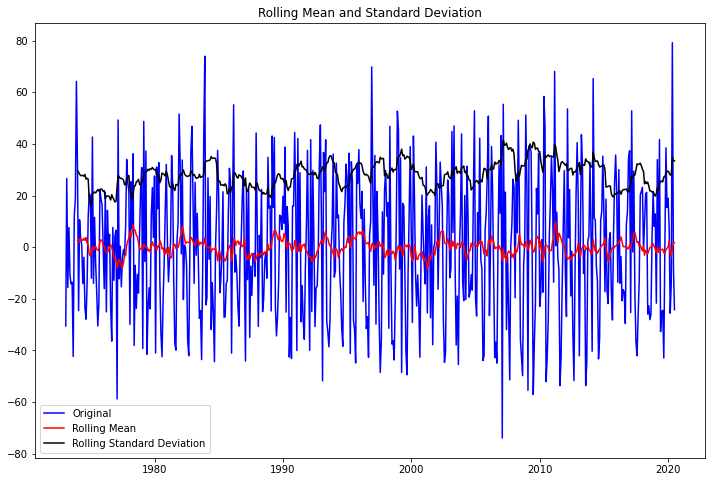

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic       -6.801983e+00
p-value               2.225091e-09
#Lags Used            1.500000e+01
#Observations Used    5.540000e+02
Critical Value 1%    -3.442209e+00
Critical Value 5%    -2.866771e+00
Critical Value 10%   -2.569556e+00
dtype: float64


In [70]:
test_stationarity(df_hyele['Hydroelectric Power Consumption'].diff().dropna(),12,0.05)

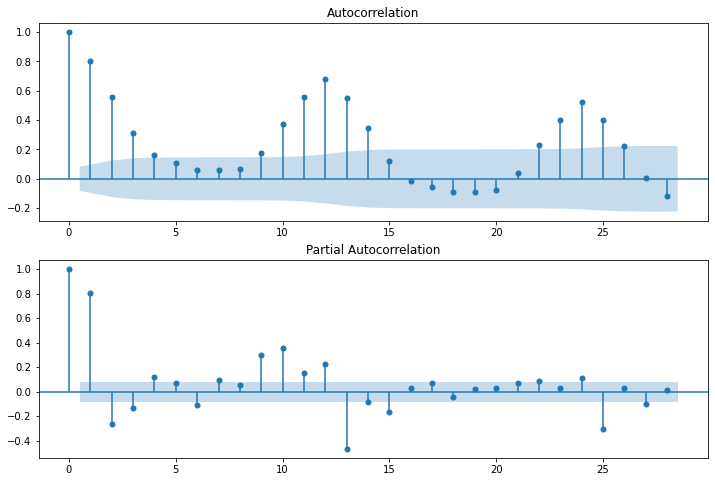

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_hyele['Hydroelectric Power Consumption'], ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_hyele['Hydroelectric Power Consumption'], ax=ax2)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

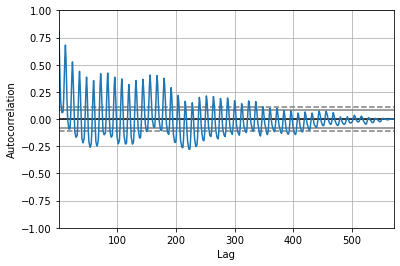

In [77]:
autocorrelation_plot(df_hyele)

In [15]:
def p_acf(series):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(series, ax=ax1) 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(series, ax=ax2)

In [16]:
def sarimax(df,p,d,q,P,D,Q,s):
    
    pdq = list(itertools.product(p,d,q))
    PDQs = [(x[0],x[1],x[2],s) for x in list(itertools.product(P,D,Q))]
    
    ans = []
    for comb in pdq:
        for combs in PDQs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df, order = comb, seasonal_order=combs,
                                                 enforce_stationarity=False, enforce_invertibility=False)
                output = mod.fit()
                ans.append([comb,combs,output.aic])
                print(f'ARIMA {comb} x {combs}12 : AIC Calculated ={output.aic}')
            except:
                continue
    
    ans_df=pd.DataFrame(ans, columns=['pdq','PDQs','AIC'])
#     ans_df.AIC.plot(figsize=(15,6))
    
    return(ans_df.loc[ans_df['AIC'].idxmin])

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4339.807968317232


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4356.657485656608


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4231.378030734885


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4212.748542834782


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4338.860873736257


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4323.431415061428


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4232.698680949594


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4205.325297645486


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4331.807996507336


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4300.81272303243


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4224.202193152965


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4218.969067802334


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4333.015897301069


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4303.167528207805


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4226.204651149722


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4197.878963280643


pdq         (6, 0, 1)
pdqs    (6, 0, 1, 12)
AIC           4197.88
Name: 15, dtype: object

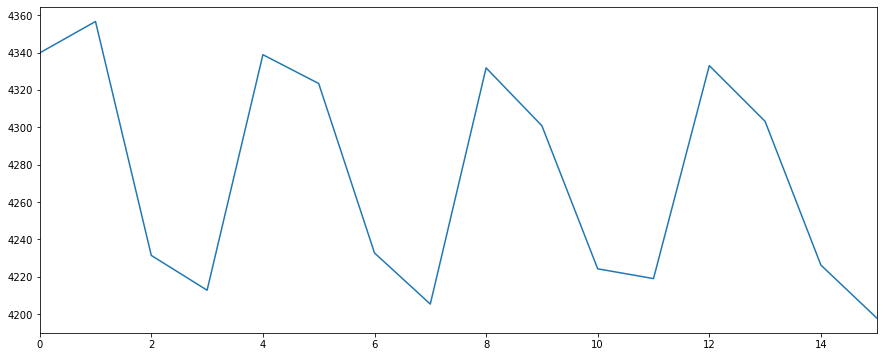

In [14]:
# sarimax(df_hyele,range(5,7),range(0,1),range(0,2),range(5,7),range(0,1),range(0,2),12)

In [17]:
def arima(df,arima,sarima):
    arima = sm.tsa.statespace.SARIMAX(df, order = arima, seasonal_order=sarima,
                                    enforce_stationarity=False, enforce_invertibility=False)
    output = arima.fit()
    print(output.summary().tables[1])
    return output

In [16]:
# arima(df_hyele,(6,0,1),(6,0,1,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.593      0.921      0.357      -0.616       1.707
ar.L2          0.0990      0.524      0.189      0.850      -0.927       1.125
ar.L3          0.0645      0.120      0.539      0.590      -0.170       0.299
ar.L4          0.1086      0.092      1.182      0.237      -0.071       0.289
ar.L5         -0.0387      0.078     -0.497      0.619      -0.191       0.114
ar.L6          0.0561      0.056      0.998      0.318      -0.054       0.166
ma.L1          0.3317      0.594      0.558      0.577      -0.833       1.496
ar.S.L12       1.1451      0.053     21.646      0.000       1.041       1.249
ar.S.L24      -0.0949      0.068     -1.404      0.160      -0.227       0.038
ar.S.L36      -0.1280      0.062     -2.067      0.039      -0.249      -0.007
ar.S.L48       0.0382      0.060      0.636      0.5

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4737.336141782083


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4633.414282139152


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4612.591407143753


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4538.684782958153


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4736.282525351615


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4632.388997934773


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4612.70570773102


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4634.072904934025


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4712.975482947473


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4616.231632643627


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4593.506157192638


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4524.701948536215


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4716.009462004611


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4621.135862173209


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4594.046519989901


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4564.426466254701


pdq         (3, 0, 0)
pdqs    (3, 0, 1, 12)
AIC            4524.7
Name: 11, dtype: object

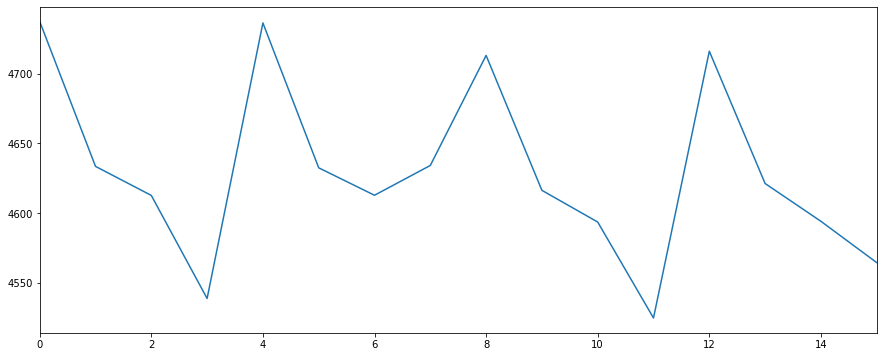

In [17]:
# sarimax(df_hyele,range(2,4),range(0,1),range(0,2),range(2,4),range(0,1),range(0,2),12)

In [18]:
# arima(df_hyele,(3,0,0),(3,0,1,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8928      0.042     21.265      0.000       0.811       0.975
ar.L2         -0.1240      0.058     -2.156      0.031      -0.237      -0.011
ar.L3          0.1045      0.045      2.343      0.019       0.017       0.192
ar.S.L12       1.1678      0.052     22.551      0.000       1.066       1.269
ar.S.L24      -0.0926      0.066     -1.394      0.163      -0.223       0.038
ar.S.L36      -0.0768      0.046     -1.657      0.098      -0.168       0.014
ma.S.L12      -0.9703      0.057    -17.056      0.000      -1.082      -0.859
sigma2       277.0787     19.865     13.948      0.000     238.144     316.013


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =7872.294377921612
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =7063.398532022104
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5544.110101892447


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5468.299626425489


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =5389.239425566337


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =5289.0011371874625
ARIMA (0, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =5260.699172148557


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =5180.025928786256


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =5138.439807876834


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =5080.189449535568


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4980.72127285756


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4976.449127899854


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4806.381285870511


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4777.868114465362


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =7168.129921429711


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6468.657119364052


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =5191.0122969346085


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =5052.071943431463


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =5014.217305290809


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4916.004637809285
ARIMA (0, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4899.9384564279535


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4830.348992339446


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4779.563565486123


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4783.581616078043


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4642.263929029266


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =5204.911279299508


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4496.748543525358


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =5295.8055065958
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5394.717105745014

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =5109.139299421791


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4939.12490686085


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4741.082044930846


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4744.761807134253


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4639.867132405113


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4618.660690834546


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4545.790917749834


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =4501.056855824816


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =4451.444235114854


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4385.858508077963


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4352.5539460484215


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4278.718823691198


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4243.253053965926
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5375.36156270136


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5100.233733561306


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4940.872073728358


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4733.698468636833


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4744.637033325211


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4640.50697116737


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4620.086674934533


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4545.840829531924


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4502.810905380342


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4467.610751802631


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4387.022850735721


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4352.5079027629945


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4278.9454355505095


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4278.804877711012


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5375.351077385985


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =5109.151828802022


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4933.114377902162


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4734.243360843541


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4737.336141782083


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4633.414282139152


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4612.591407143753


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4538.684782958153


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =4488.308720068289


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =4446.089824313781


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4379.697366466349


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4347.3369851984135


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4271.974708755295


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4262.01628960313


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5377.125153037381


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5102.1045896571595


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4889.442007378158
ARIMA (2, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4733.835081014221


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4736.282525351615


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4632.388997934773


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4612.70570773102


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4634.072904934025


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4487.92170164659


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4480.217861841236


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4379.431816351879


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4354.93344780283


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4270.221708387827


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4271.511968611995


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5367.0570255718085


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =5108.271981122563


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4912.618076299848


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4717.680738009222


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4712.975482947473


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4616.231632643627


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4593.506157192638


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4524.701948536215


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =4468.897388844451


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =4430.217599594954


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4360.278304364056


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4374.173360866753


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4249.7374650260645


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4243.189889857638


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5368.131544556336


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5030.758137411796


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4879.418676016685


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4718.2168733338685


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4716.009462004611


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4621.135862173209


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4594.046519989901


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4564.426466254701


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4469.940486646871


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4441.925321917476


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4360.298204636037


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4379.7220782515415


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4248.174686079665


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (3, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4263.068728984314


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5321.7331366937815


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =5094.221613585652


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4901.85046247187


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4709.9721165901965


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4704.564161511238


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4689.465366878627


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4584.541472312118


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4577.548988322313


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =4461.049924751048


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =4426.208293614578


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4349.471411912082


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4320.945173589047


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4239.9841882693


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4263.577926596059


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5255.284671624371


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5047.598674004092


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4872.57321885282


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4711.430394521032
ARIMA (4, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4705.11573421034


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4610.215170400129


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4584.3098528617875


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4547.748629989597


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4461.979450251345


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4427.314967575429
ARIMA (4, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4351.022576701739


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4312.520721452056


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4240.995296203861


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (4, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4239.141159457078


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5299.435036493982


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =5087.46063090498


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4895.726498287307


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4703.400266790237
ARIMA (5, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4696.8052865180225


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4607.1895051471165


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4576.680446080009


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4570.661775216671


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =4454.202367406433


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =4425.489366188191


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4339.807968317232


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4356.657485656608


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4231.378030734885


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4212.748542834782


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5297.646031432965


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5038.4938397634205


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4865.4662873588195


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4704.734208040563


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4698.796021441076


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4605.650157560738


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4578.273830084658


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4515.581599929022


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4455.803660691443


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4417.543716446828


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4338.860873736257


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4323.431415061428


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4232.698680949594


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (5, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4205.325297645486


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5292.779675292397


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =5088.482635584113


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4888.382152069822


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4697.3278120780315


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4690.6858049192415


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4677.233833475297


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (3, 0, 0, 12)12 : AIC Calculated =4570.667169857123


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (3, 0, 1, 12)12 : AIC Calculated =4596.249170440617


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (4, 0, 0, 12)12 : AIC Calculated =4446.936653419854


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (4, 0, 1, 12)12 : AIC Calculated =4453.604416995446


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (5, 0, 0, 12)12 : AIC Calculated =4331.807996507336


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (5, 0, 1, 12)12 : AIC Calculated =4300.81272303243


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 0) x (6, 0, 0, 12)12 : AIC Calculated =4224.202193152965


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 0) x (6, 0, 1, 12)12 : AIC Calculated =4218.969067802334


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =5291.256979640557


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5033.309166631232


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4862.769772110514


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4697.811735691342


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4692.65683195953


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4598.999896477973


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (3, 0, 0, 12)12 : AIC Calculated =4572.67460161275


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (3, 0, 1, 12)12 : AIC Calculated =4542.734516004579


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (4, 0, 0, 12)12 : AIC Calculated =4448.95833580039


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (4, 0, 1, 12)12 : AIC Calculated =4413.161499866646


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (6, 0, 1) x (5, 0, 0, 12)12 : AIC Calculated =4333.015897301069


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (5, 0, 1, 12)12 : AIC Calculated =4303.167528207805


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (6, 0, 0, 12)12 : AIC Calculated =4226.204651149722


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (6, 0, 1) x (6, 0, 1, 12)12 : AIC Calculated =4197.878963280643


pdq         (6, 0, 1)
pdqs    (6, 0, 1, 12)
AIC           4197.88
Name: 195, dtype: object

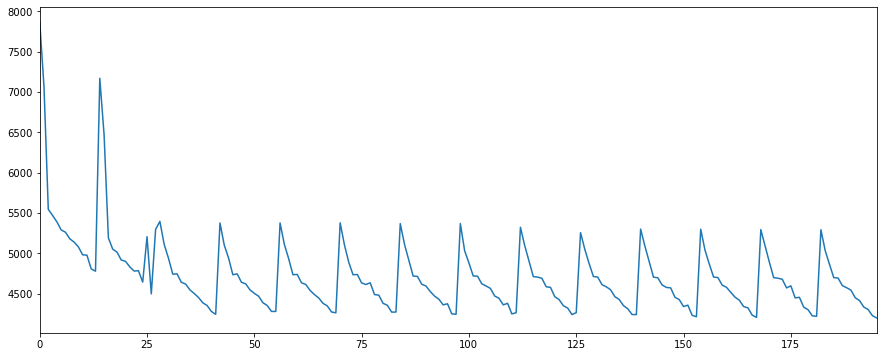

In [19]:
# sarimax(df_hyele,range(0,7),range(0,1),range(0,2),range(0,7),range(0,1),range(0,2),12)

In [20]:
# arima(df_hyele,(6,0,1),(6,0,1,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.593      0.921      0.357      -0.616       1.707
ar.L2          0.0990      0.524      0.189      0.850      -0.927       1.125
ar.L3          0.0645      0.120      0.539      0.590      -0.170       0.299
ar.L4          0.1086      0.092      1.182      0.237      -0.071       0.289
ar.L5         -0.0387      0.078     -0.497      0.619      -0.191       0.114
ar.L6          0.0561      0.056      0.998      0.318      -0.054       0.166
ma.L1          0.3317      0.594      0.558      0.577      -0.833       1.496
ar.S.L12       1.1451      0.053     21.646      0.000       1.041       1.249
ar.S.L24      -0.0949      0.068     -1.404      0.160      -0.227       0.038
ar.S.L36      -0.1280      0.062     -2.067      0.039      -0.249      -0.007
ar.S.L48       0.0382      0.060      0.636      0.5

## Models

In [ ]:
p,d,q,P,D,Q,s=range(2,5),range(0,1),range(2,5),range(2,5),range(0,1),range(2,5),12
# range(66,70),range(0,1),range(2,5),12
pdq = list(itertools.product(p,d,q))
PDQ = list(itertools.product(P,D,Q))
PDQs = [(x[0],x[1],x[2],s) for x in PDQ]
    
ans = []
for comb in pdq:
    for combs in PDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_hyele_train, order = comb, seasonal_order=combs,
                                            enforce_stationarity=False, enforce_invertibility=False)
            output = mod.fit()
            ans.append([comb,combs,output.aic])
            print(f'ARIMA {comb} x {combs}12 : AIC Calculated ={output.aic}')
        except:
            continue
    
ans_df=pd.DataFrame(ans, columns=['pdq','PDQs','AIC'])

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =3679.423990411715


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (3, 0, 2, 12)12 : AIC Calculated =3586.244149947374


In [94]:
ans_df.loc[ans_df['AIC'].idxmin]

pdq         (2, 0, 4)
PDQs    (3, 0, 4, 12)
AIC           3436.36
Name: 23, dtype: object

In [18]:
output_hyele = arima(df_hyele_train,(2,0,4),(3,0,4,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7621      0.515      1.479      0.139      -0.248       1.772
ar.L2          0.1468      0.489      0.301      0.764      -0.811       1.104
ma.L1          0.1352      0.510      0.265      0.791      -0.865       1.135
ma.L2         -0.2172      0.062     -3.482      0.000      -0.340      -0.095
ma.L3         -0.1633      0.125     -1.304      0.192      -0.409       0.082
ma.L4          0.0859      0.100      0.857      0.392      -0.111       0.283
ar.S.L12      -0.1041      0.121     -0.859      0.390      -0.342       0.133
ar.S.L24       0.5149      0.097      5.293      0.000       0.324       0.705
ar.S.L36       0.5892      0.111      5.331      0.000       0.373       0.806
ma.S.L12       0.1595      0.156      1.020      0.308      -0.147       0.466
ma.S.L24      -0.5568      0.116     -4.787      0.0

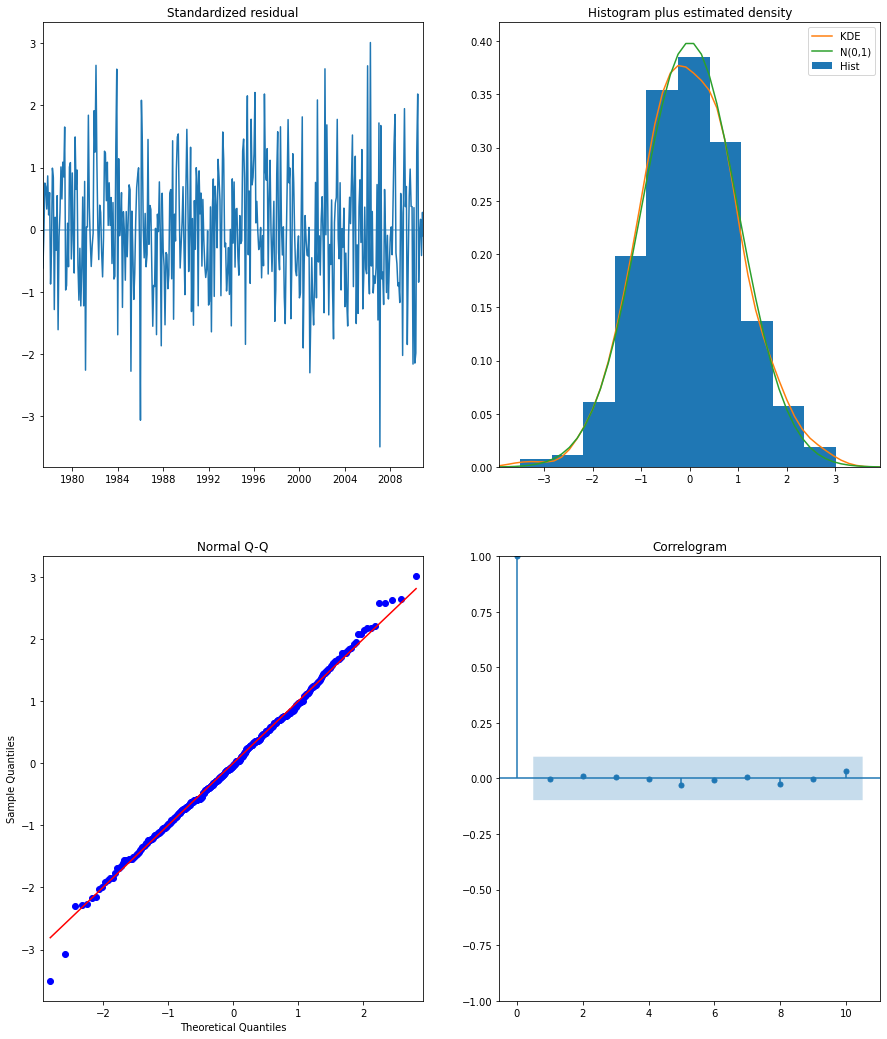

In [96]:
output_hyele.plot_diagnostics(figsize=(15,18))
plt.show()

In [98]:
df_hyele_test

Hydroelectric Power Consumption
Month                                      
2011-01-01                          248.060
2011-02-01                          234.459
2011-03-01                          302.503
2011-04-01                          303.084
2011-05-01                          316.615
...                                     ...
2020-03-01                          202.739
2020-04-01                          189.099
2020-05-01                          268.273
2020-06-01                          260.567
2020-07-01                          236.338

[115 rows x 1 columns]

In [19]:
pred_hyele = output_hyele.get_prediction(start=pd.to_datetime('2011-01-01'),dynamic = False)
pred_hyele_conf = pred_hyele.conf_int()

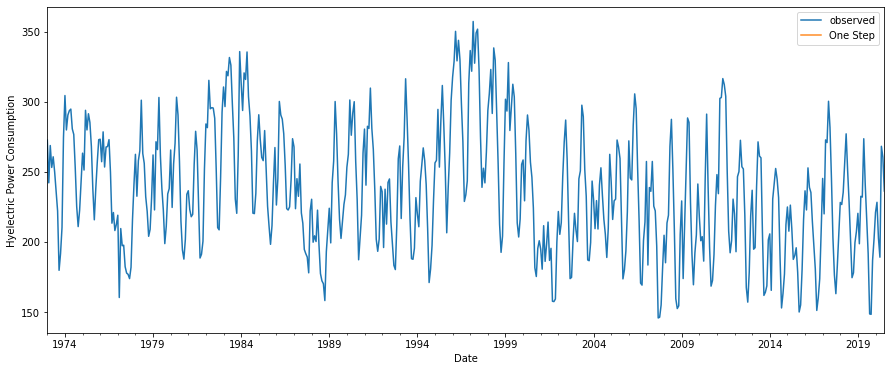

In [20]:
rcParams['figure.figsize']=15,6
ax=df_hyele.plot(label='observed')
pred_hyele.predicted_mean.plot(ax=ax,label='One Step',alpha = 0.9)

# ax.fill_between(pred_hyele_conf.index,pred_hyele_conf.iloc[:,0],pred_hyele_conf[:,1],
#               color='g',alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Hyelectric Power Consumption')
plt.legend()

plt.show()

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 492.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<AxesSubplot:>

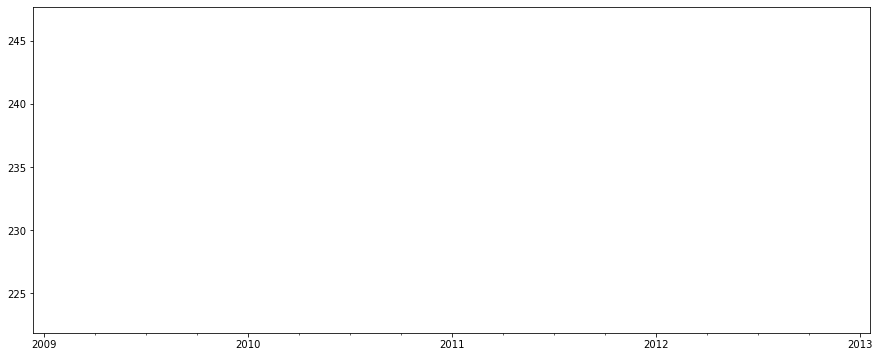

In [21]:
pred_hyele.predicted_mean.plot(label='One Step',alpha = 0.9)

In [23]:
print(type(pred_hyele.predicted_mean))

<class 'pandas.core.series.Series'>


In [24]:
pred_hyele.predicted_mean

2011-01-01    234.788981
Freq: MS, dtype: float64

In [28]:
pred_hyele = output_hyele.get_forecast(steps = 120,dynamic = False)

<AxesSubplot:>

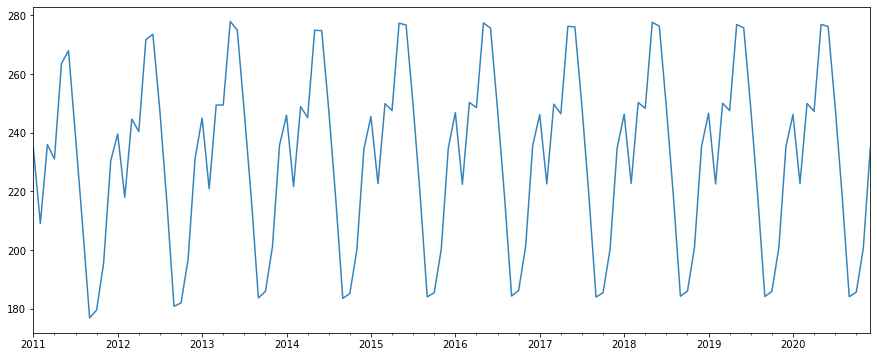

In [29]:
pred_hyele.predicted_mean.plot(label='One Step',alpha = 0.9)

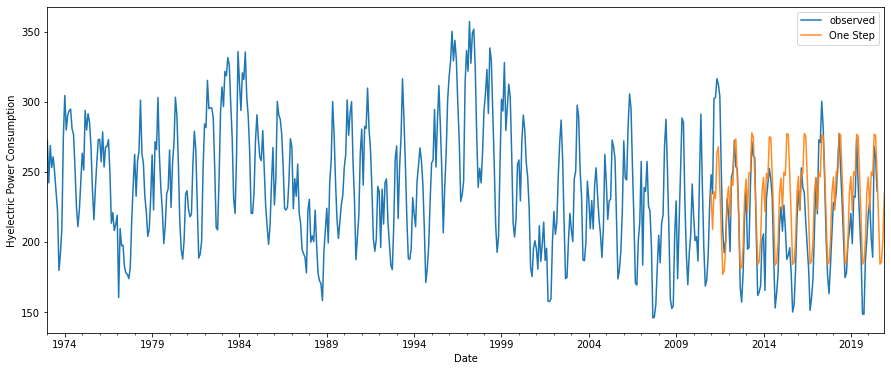

In [30]:
rcParams['figure.figsize']=15,6
ax=df_hyele.plot(label='observed')
pred_hyele.predicted_mean.plot(ax=ax,label='One Step',alpha = 0.9)

# ax.fill_between(pred_hyele_conf.index,pred_hyele_conf.iloc[:,0],pred_hyele_conf[:,1],
#               color='g',alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Hyelectric Power Consumption')
plt.legend()

plt.show()

## Auto Arima

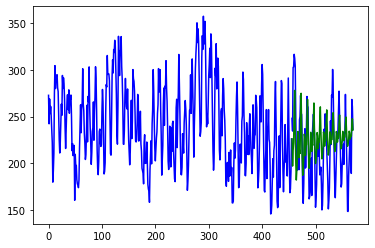

In [25]:
# Fit your model
model = pm.auto_arima(df_hyele_train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(df_hyele_test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(df_hyele.shape[0])
plt.plot(x[:456], df_hyele_train, c='blue')
plt.plot(x[456:], df_hyele_test, c='blue')
plt.plot(x[456:], forecasts, c='green')
plt.show()

# Geothermal Energy Consumption

## Data Exploration

In [19]:
df_geo

Geothermal Energy Consumption
Month                                    
1973-01-01                          1.491
1973-02-01                          1.363
1973-03-01                          1.412
1973-04-01                          1.649
1973-05-01                          1.537
...                                   ...
2020-03-01                         18.946
2020-04-01                         17.553
2020-05-01                         18.312
2020-06-01                         17.424
2020-07-01                         18.571

[571 rows x 1 columns]

In [21]:
df_geo.isna().sum()

Geothermal Energy Consumption    0
dtype: int64

In [25]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 571 entries, 1973-01-01 to 2020-07-01
Data columns (total 1 columns):
Geothermal Energy Consumption    571 non-null float64
dtypes: float64(1)
memory usage: 8.9 KB


<AxesSubplot:xlabel='Month'>

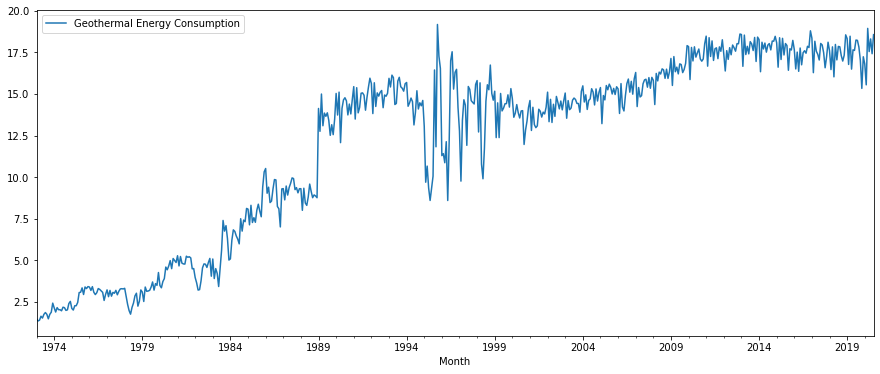

In [22]:
df_geo.plot(figsize=(15,6))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

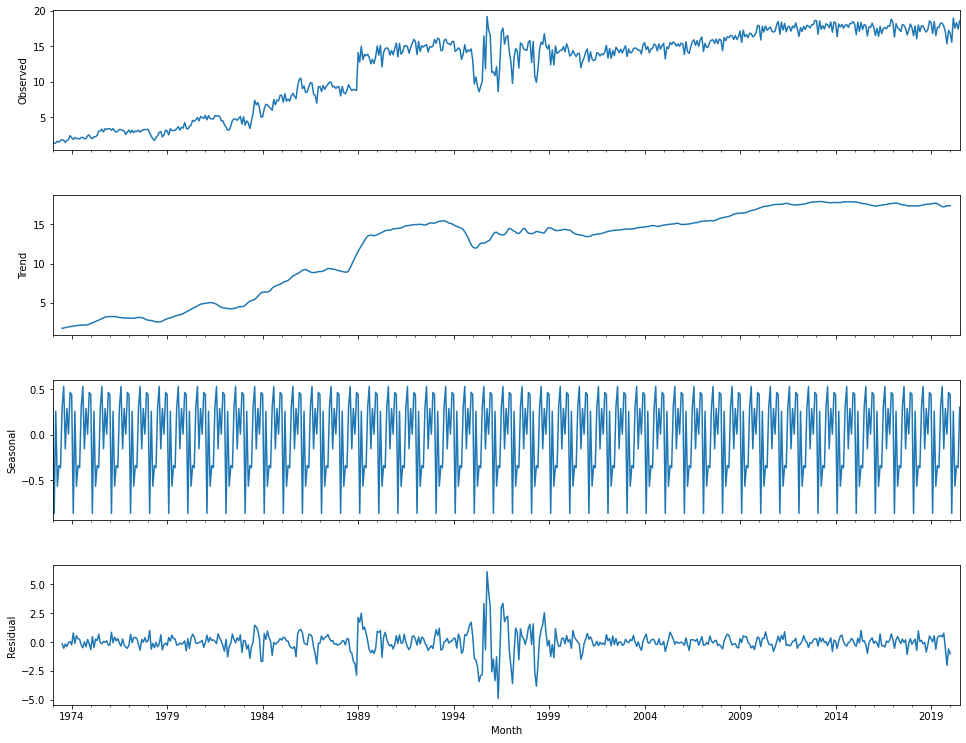

In [17]:
seasonal_decomp(df_geo['Geothermal Energy Consumption'])

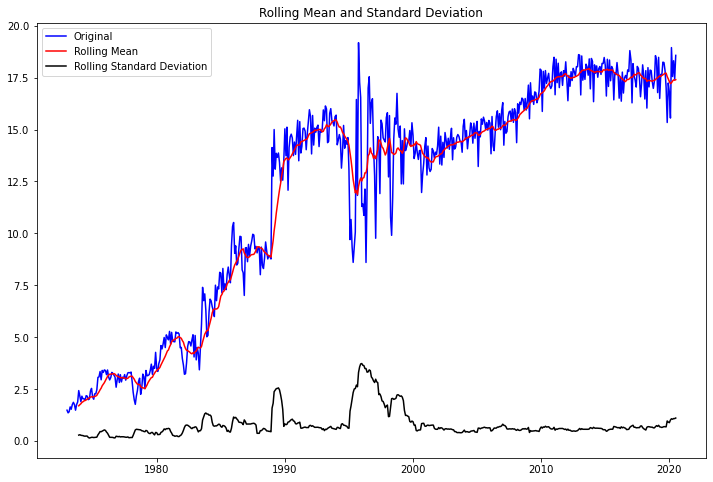

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic         -1.698244
p-value                 0.432017
#Lags Used             17.000000
#Observations Used    553.000000
Critical Value 1%      -3.442230
Critical Value 5%      -2.866781
Critical Value 10%     -2.569561
dtype: float64


In [18]:
test_stationarity(df_geo['Geothermal Energy Consumption'],12,0.05)

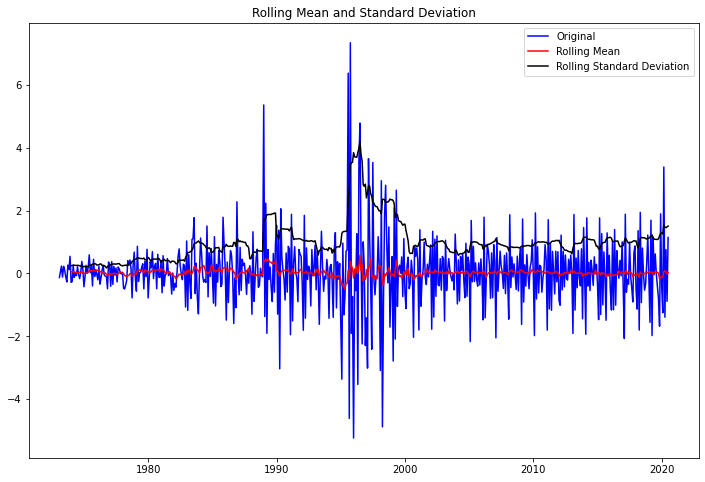

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic       -6.276453e+00
p-value               3.889951e-08
#Lags Used            1.600000e+01
#Observations Used    5.530000e+02
Critical Value 1%    -3.442230e+00
Critical Value 5%    -2.866781e+00
Critical Value 10%   -2.569561e+00
dtype: float64


In [19]:
diff_1 = df_geo['Geothermal Energy Consumption']-df_geo['Geothermal Energy Consumption'].shift(1)
diff_1 = diff_1.dropna(inplace=False)
test_stationarity(diff_1,12,0.05)

In [20]:
def shift(series,shift_no):
    diff = series-series.shift(shift_no)
    diff = diff.dropna(inplace=False)
    return diff

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

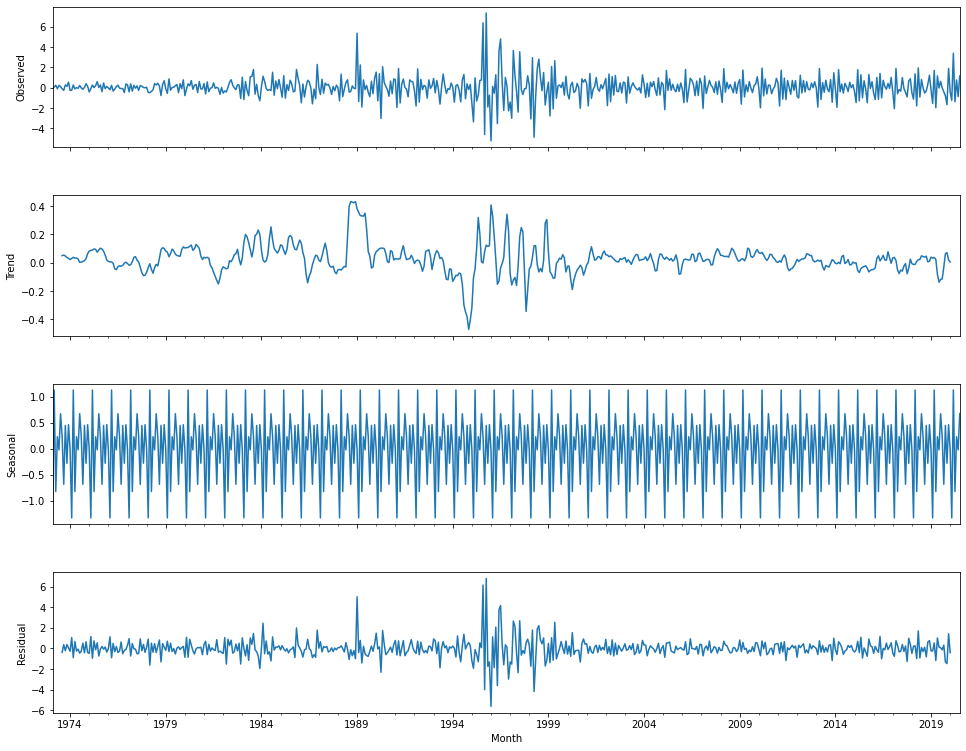

In [21]:
seasonal_decomp(diff_1)

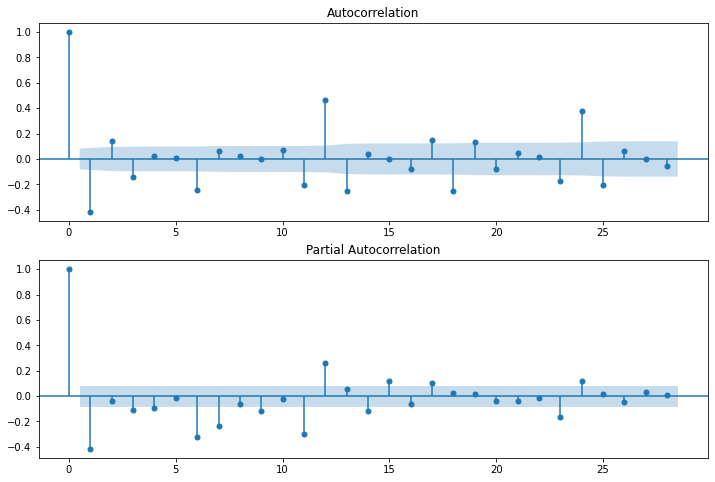

In [22]:
p_acf(diff_1)

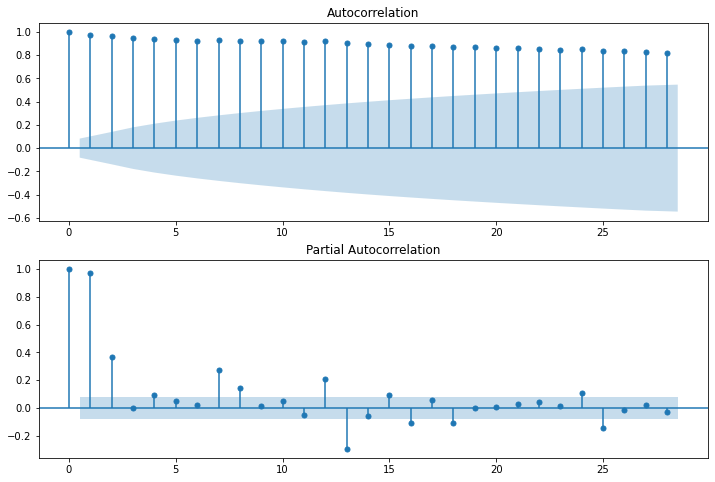

In [23]:
p_acf(df_geo['Geothermal Energy Consumption'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

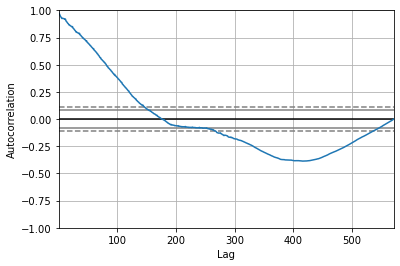

In [63]:
autocorrelation_plot(df_geo)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

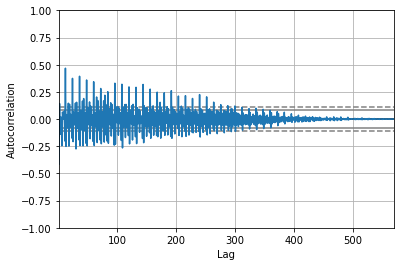

In [64]:
autocorrelation_plot(diff_1)

## Base Model

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =1762.492635780281
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1506.0792805568015
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =1637.2709829415535


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1507.224140775627


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =1548.2264041510184


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =1482.8587580194585
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =1692.092626977178

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1459.5383807290902


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =1571.8731811863063


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1454.958627162433


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =1490.7722148293194


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =1433.6803679481966
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =1692.6585357371423


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1459.585601209626


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =1567.3289962953559


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1455.4134305022117


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =1488.1106083639386


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =1430.0877368142787


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =1683.6063308244593


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1446.7509300516476


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =1558.7208715343443


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1446.3232393029505


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =1478.189562598054


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =1423.2183760784906
ARIMA (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =1691.2654722546963


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1461.0707238656119


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =1566.0471486852994


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1454.3228245592422


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =1487.6255858499817


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =1429.5550601242362


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =1683.634328050531


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1452.1636840473252


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =1555.7822601851126


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1457.8082627351985


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =1475.169717298526


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =1427.1188887243843


pdq         (1, 1, 1)
pdqs    (2, 1, 1, 12)
AIC           1423.22
Name: 23, dtype: object

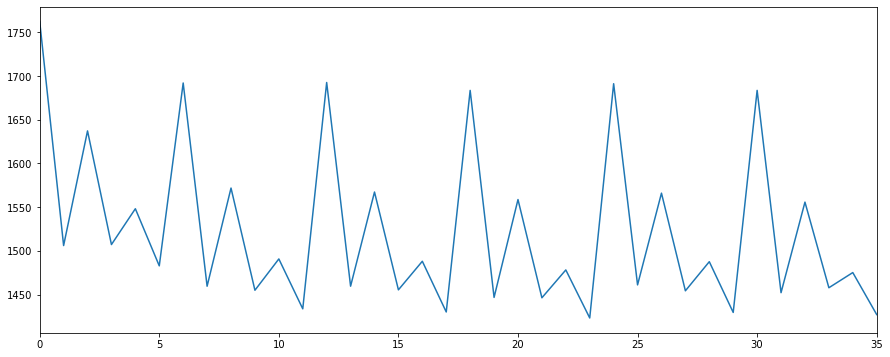

In [51]:
sarimax(df_geo,range(0,3),range(1,2),range(0,2),12)

In [52]:
arima(df_geo,(1,1,1),(2,1,1,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7783      0.035    -22.070      0.000      -0.847      -0.709
ma.L1          0.5572      0.052     10.710      0.000       0.455       0.659
ar.S.L12       0.1667      0.044      3.802      0.000       0.081       0.253
ar.S.L24    -2.79e-06      0.048  -5.78e-05      1.000      -0.095       0.095
ma.S.L12      -0.9051      0.033    -27.508      0.000      -0.970      -0.841
sigma2         0.8063      0.019     42.658      0.000       0.769       0.843


# Solar Energy Consumption

## Data Exploration

In [24]:
df_solar

Solar Energy Consumption
Month                              
1973-01-01            Not Available
1973-02-01            Not Available
1973-03-01            Not Available
1973-04-01            Not Available
1973-05-01            Not Available
...                             ...
2020-03-01                   94.035
2020-04-01                  113.675
2020-05-01                  134.061
2020-06-01                  131.784
2020-07-01                  140.897

[571 rows x 1 columns]

In [25]:
df_solar.isna().sum()

Solar Energy Consumption    0
dtype: int64

In [26]:
df_solar['Solar Energy Consumption']=df_solar['Solar Energy Consumption'].replace('Not Available',0)

<AxesSubplot:xlabel='Month'>

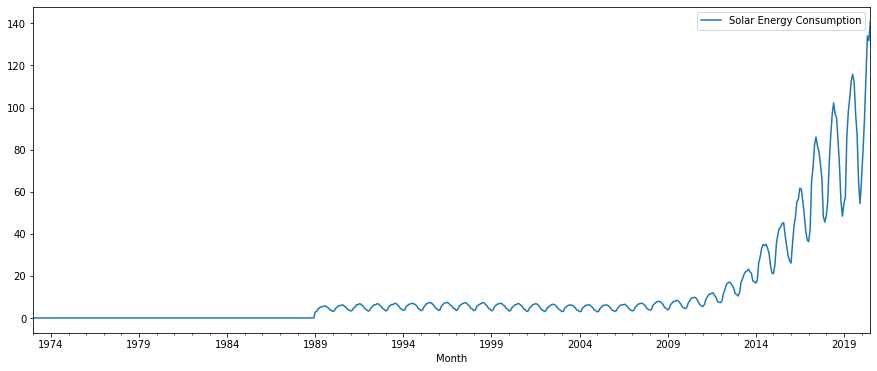

In [27]:
df_solar.plot(figsize=(15,6))

In [28]:
df_solar=df_solar.loc[df_solar['Solar Energy Consumption']!=0]

<AxesSubplot:xlabel='Month'>

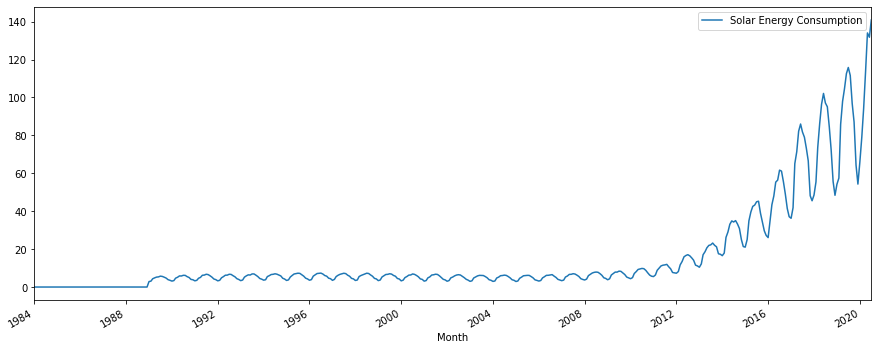

In [29]:
df_solar.plot(figsize=(15,6))

In [30]:
seasonal_decomp(df_solar['Solar Energy Consumption'])

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

<Figure size 432x288 with 0 Axes>

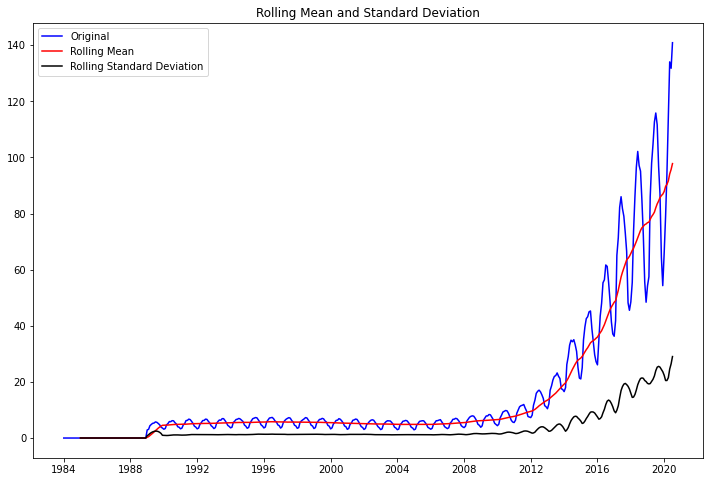

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic          2.976044
p-value                 1.000000
#Lags Used             15.000000
#Observations Used    422.000000
Critical Value 1%      -3.445941
Critical Value 5%      -2.868413
Critical Value 10%     -2.570431
dtype: float64


In [31]:
test_stationarity(df_solar['Solar Energy Consumption'],12,0.05)

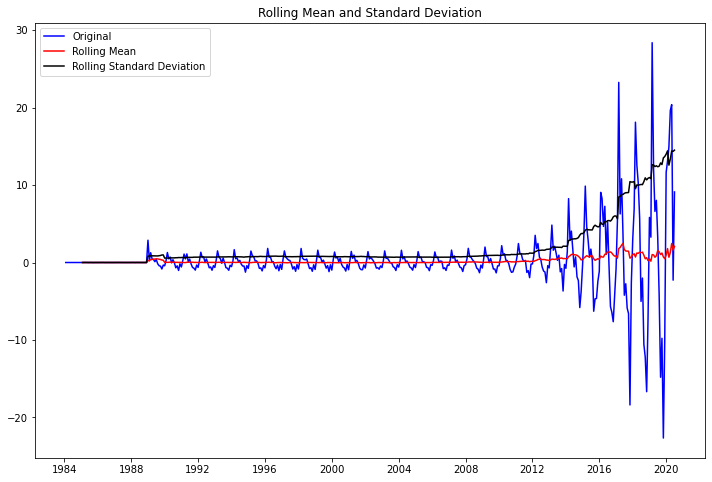

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic         -0.427213
p-value                 0.905455
#Lags Used             14.000000
#Observations Used    422.000000
Critical Value 1%      -3.445941
Critical Value 5%      -2.868413
Critical Value 10%     -2.570431
dtype: float64


In [32]:
diff_1_solar=shift(df_solar['Solar Energy Consumption'],1)
test_stationarity(diff_1_solar,12,0.05)

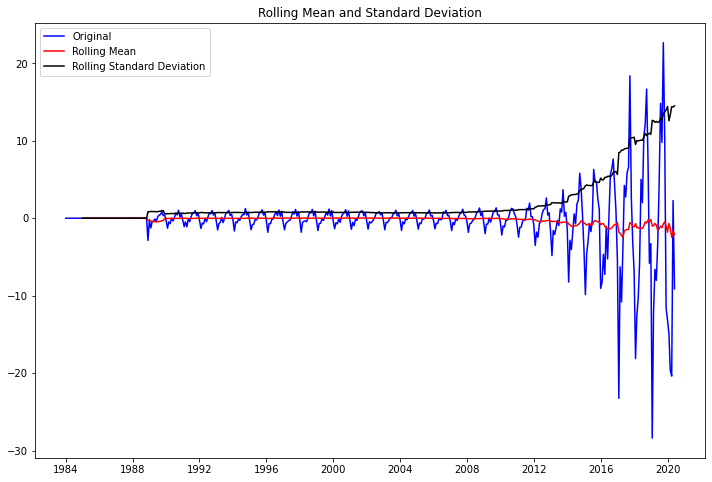

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic         -0.427213
p-value                 0.905455
#Lags Used             14.000000
#Observations Used    422.000000
Critical Value 1%      -3.445941
Critical Value 5%      -2.868413
Critical Value 10%     -2.570431
dtype: float64


In [71]:
diff_2_solar=shift(df_solar['Solar Energy Consumption'],-1)
test_stationarity(diff_2_solar,12,0.05)

In [ ]:
# seasonal_decomp(diff...)

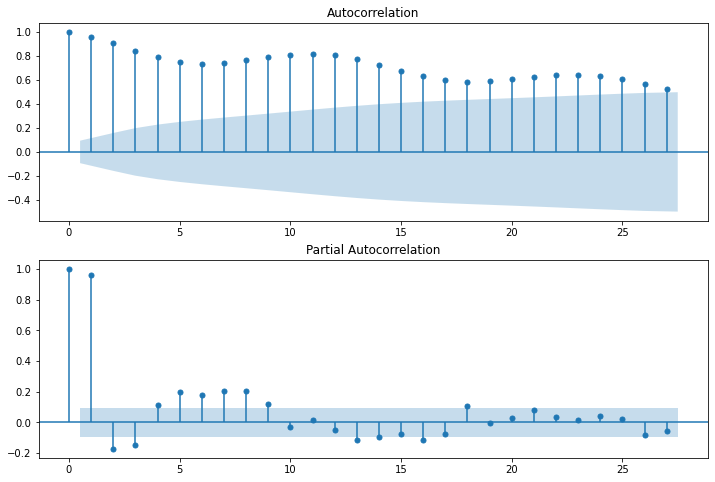

In [34]:
p_acf(df_solar['Solar Energy Consumption'])

## Base Model

# Wind Energy Consumption

## Data Exploration

In [35]:
df_wind

Wind Energy Consumption
Month                             
1973-01-01           Not Available
1973-02-01           Not Available
1973-03-01           Not Available
1973-04-01           Not Available
1973-05-01           Not Available
...                            ...
2020-03-01                 268.416
2020-04-01                 268.881
2020-05-01                 256.554
2020-06-01                 274.458
2020-07-01                 206.661

[571 rows x 1 columns]

In [36]:
df_wind['Wind Energy Consumption']=df_wind['Wind Energy Consumption'].replace('Not Available',0)

<AxesSubplot:xlabel='Month'>

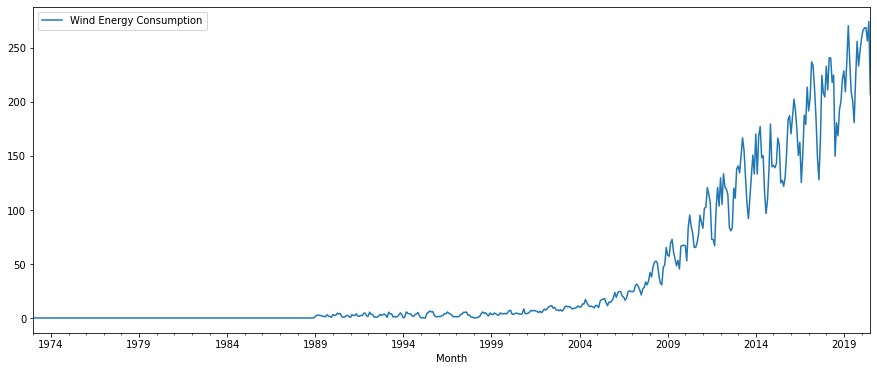

In [37]:
df_wind.plot(figsize=(15,6))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

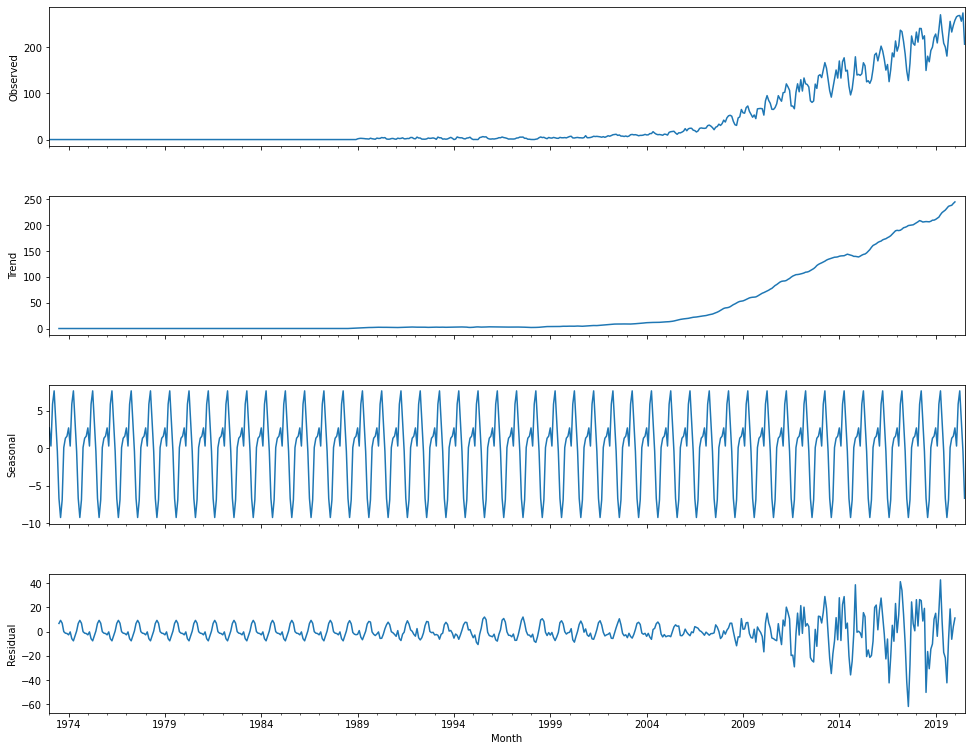

In [38]:
seasonal_decomp(df_wind)

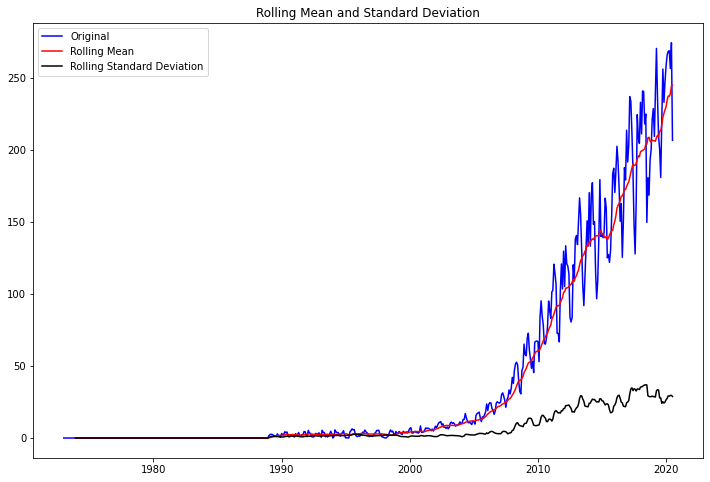

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic          4.261372
p-value                 1.000000
#Lags Used             18.000000
#Observations Used    552.000000
Critical Value 1%      -3.442252
Critical Value 5%      -2.866790
Critical Value 10%     -2.569566
dtype: float64


In [39]:
test_stationarity(df_wind['Wind Energy Consumption'],12,0.05)

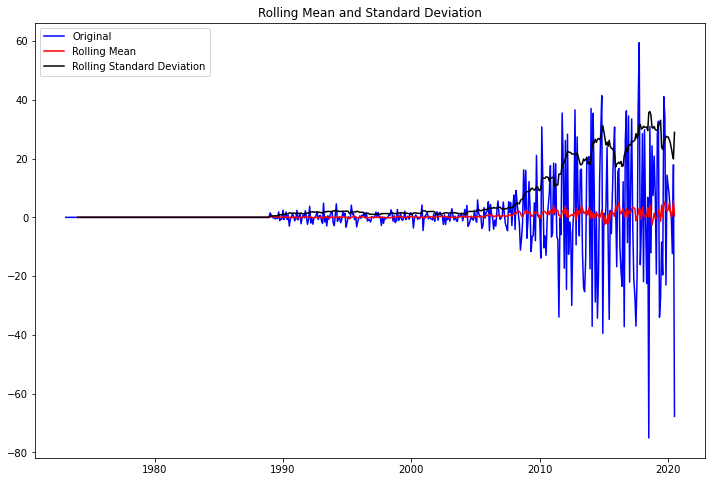

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic         -2.539234
p-value                 0.106218
#Lags Used             19.000000
#Observations Used    550.000000
Critical Value 1%      -3.442296
Critical Value 5%      -2.866809
Critical Value 10%     -2.569576
dtype: float64


In [40]:
diff_1_wind = shift(df_wind['Wind Energy Consumption'],1)
test_stationarity(diff_1_wind,12,0.05)

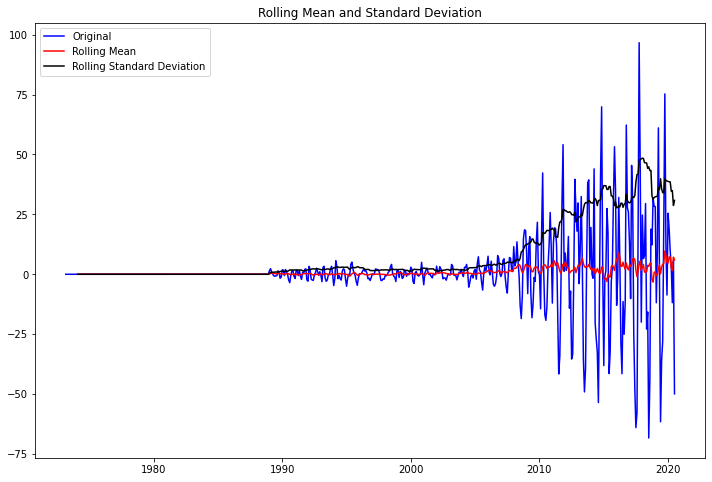

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic         -3.444396
p-value                 0.009535
#Lags Used             19.000000
#Observations Used    549.000000
Critical Value 1%      -3.442317
Critical Value 5%      -2.866819
Critical Value 10%     -2.569582
dtype: float64


In [41]:
diff_2_wind = shift(df_wind['Wind Energy Consumption'],2)
test_stationarity(diff_2_wind,12,0.05)

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

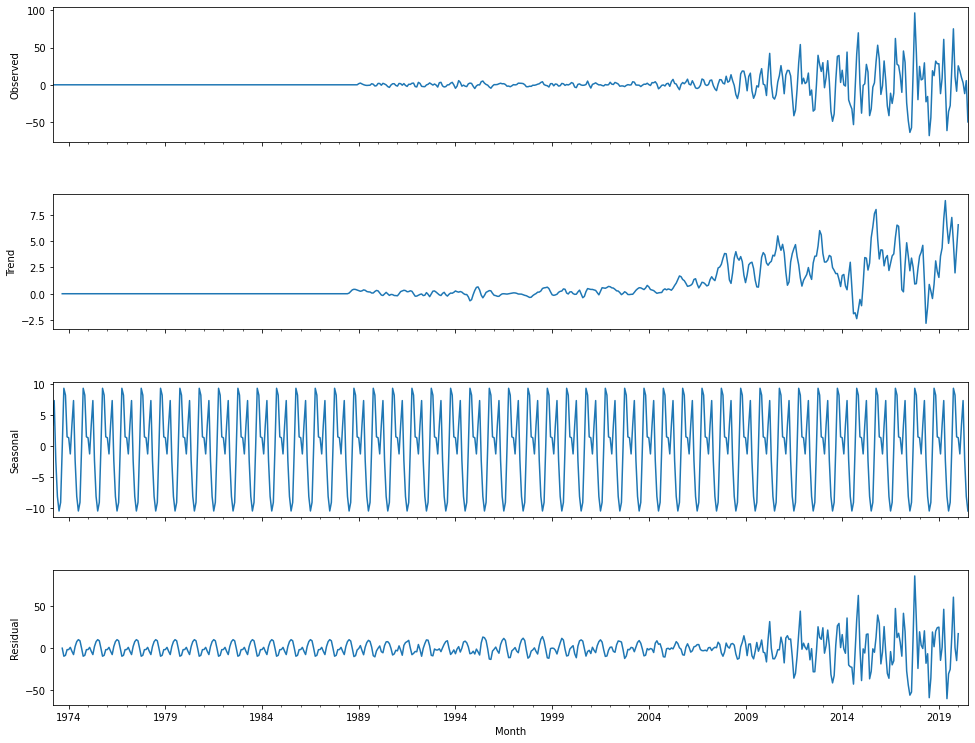

In [43]:
seasonal_decomp(diff_2_wind)

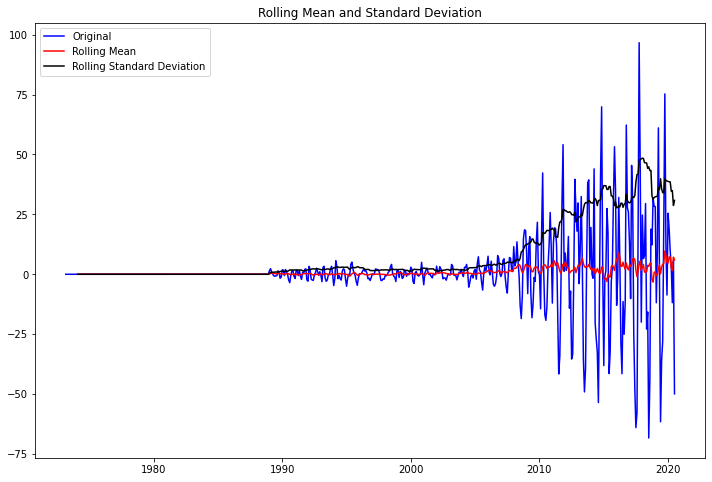

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic         -3.444396
p-value                 0.009535
#Lags Used             19.000000
#Observations Used    549.000000
Critical Value 1%      -3.442317
Critical Value 5%      -2.866819
Critical Value 10%     -2.569582
dtype: float64


In [53]:
test_stationarity(diff_2_wind,12,0.01)

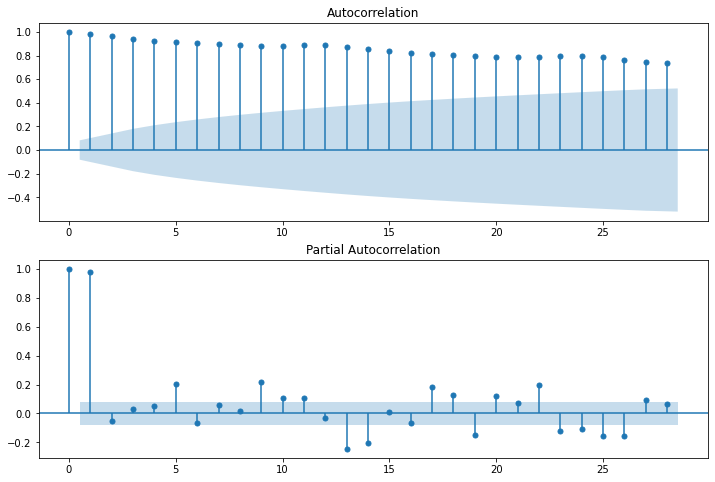

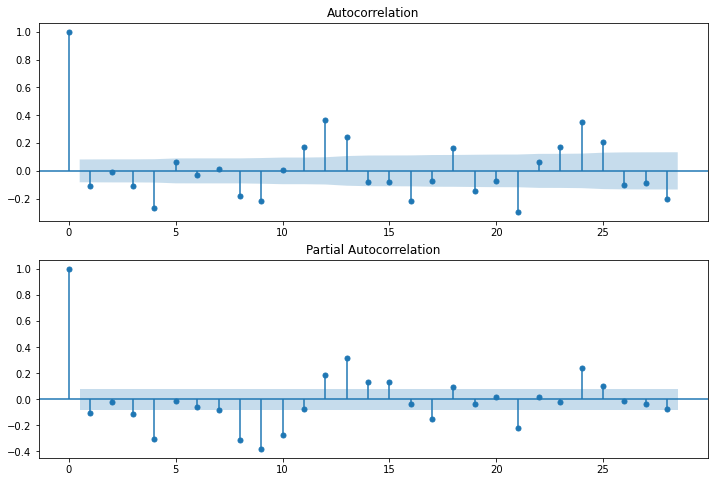

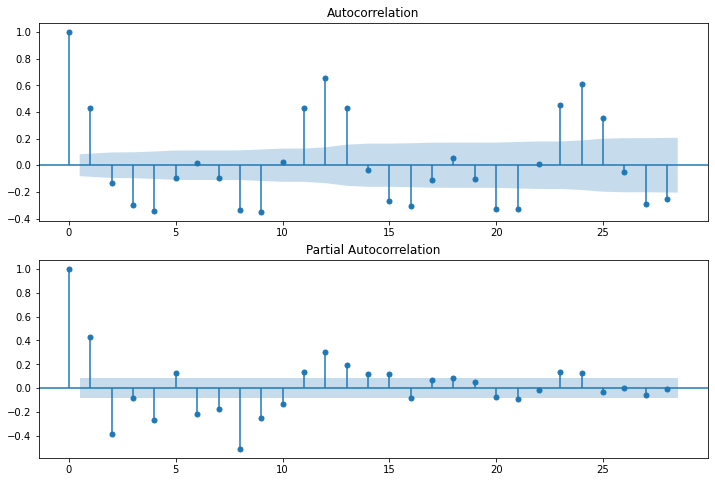

In [42]:
p_acf(df_wind)
p_acf(diff_1_wind)
p_acf(diff_2_wind)

## Base Model

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =5405.754621020399
ARIMA (0, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4815.931322030625


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =5055.091499312458


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4690.531736546239


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =4845.463791890325


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =4539.8226896526485


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (3, 2, 0, 12)12 : AIC Calculated =4501.038437990594


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (3, 2, 1, 12)12 : AIC Calculated =4347.9737004544


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (4, 2, 0, 12)12 : AIC Calculated =4372.766820540892


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 0) x (4, 2, 1, 12)12 : AIC Calculated =4251.985056746738


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4816.411881658507


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =4236.350425303108


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4469.726290533455


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =4103.490394928615


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =4262.0310241029965


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3977.351367818721


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (3, 2, 0, 12)12 : AIC Calculated =3961.939607029538


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (3, 2, 1, 12)12 : AIC Calculated =3828.0295933263255


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (4, 2, 0, 12)12 : AIC Calculated =3846.5132135682265


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 1) x (4, 2, 1, 12)12 : AIC Calculated =3742.4562659931703
ARIMA (1, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =5074.2468779097


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4492.664490239844


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4716.554098177513


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4360.288605613368


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =4493.056278357706


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =4208.934977369256


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (3, 2, 0, 12)12 : AIC Calculated =4220.457455587154


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (3, 2, 1, 12)12 : AIC Calculated =4060.574187918


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (4, 2, 0, 12)12 : AIC Calculated =4081.9009964194047


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) x (4, 2, 1, 12)12 : AIC Calculated =3970.593173491491


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4639.147666240549


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =4064.803851542073


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4282.19185545836


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =3932.081509725811


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =4061.315056903233


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3807.052529015422


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (3, 2, 0, 12)12 : AIC Calculated =3820.2263025724556


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (3, 2, 1, 12)12 : AIC Calculated =3689.342841119882


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (4, 2, 0, 12)12 : AIC Calculated =3700.3110803645864


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 1) x (4, 2, 1, 12)12 : AIC Calculated =3607.7872289943684


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =4896.986680570268


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4307.9515734419


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4472.384972892609


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4129.918820572537


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =4235.959665154892


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =4006.5334088113104


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (3, 2, 0, 12)12 : AIC Calculated =4014.598261926346


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (3, 2, 1, 12)12 : AIC Calculated =3905.3007602689972


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (4, 2, 0, 12)12 : AIC Calculated =3914.72670465529


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 0) x (4, 2, 1, 12)12 : AIC Calculated =3820.3208084789276


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4577.747155621506


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =3999.856995720904


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4199.870602715506


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =3867.3152032454855


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =3977.3762102543387


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3744.2556208298547


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (3, 2, 0, 12)12 : AIC Calculated =3745.746024702105


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (3, 2, 1, 12)12 : AIC Calculated =3637.9739868813717
ARIMA (2, 2, 1) x (4, 2, 0, 12)12 : AIC Calculated =3640.9567406072947


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) x (4, 2, 1, 12)12 : AIC Calculated =3557.8739448097203


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =4811.634438700728


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4237.662384936941


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4414.158209931701


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4072.932396303681


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =4181.8321048891285


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =3945.609827101075


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (3, 2, 0, 12)12 : AIC Calculated =3930.913262587286


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (3, 2, 1, 12)12 : AIC Calculated =3833.049341717649


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (4, 2, 0, 12)12 : AIC Calculated =3831.141430656193


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 0) x (4, 2, 1, 12)12 : AIC Calculated =3749.285170803305


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4549.305819958663


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =3986.5197305771153


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4192.239630962396


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =3859.140118238783


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =3970.4465770827615


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3732.397496751868


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (3, 2, 0, 12)12 : AIC Calculated =3732.766735621224


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (3, 2, 1, 12)12 : AIC Calculated =3617.4314332377817


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (4, 2, 0, 12)12 : AIC Calculated =3619.2179637861673


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) x (4, 2, 1, 12)12 : AIC Calculated =3538.3775584392215


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =4706.42377951442


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4138.608399443948


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4326.105908797768


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =3972.164298461345


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =4072.5721690938162


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =3830.4431675293545


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (3, 2, 0, 12)12 : AIC Calculated =3820.295281493551


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (3, 2, 1, 12)12 : AIC Calculated =3727.555533852871


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (4, 2, 0, 12)12 : AIC Calculated =3713.8219995506593


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 0) x (4, 2, 1, 12)12 : AIC Calculated =3647.554976399399


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4521.177700670662


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =3968.564120937598


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4170.714557950125


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =3836.8550016643076


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =3948.6718961632478


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3710.0807472975607


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (3, 2, 0, 12)12 : AIC Calculated =3723.0287907773923


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (3, 2, 1, 12)12 : AIC Calculated =3600.3794312572413


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (4, 2, 0, 12)12 : AIC Calculated =3604.073669022316


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) x (4, 2, 1, 12)12 : AIC Calculated =3522.059538007824


pdq         (4, 2, 1)
pdqs    (4, 2, 1, 12)
AIC           3522.06
Name: 99, dtype: object

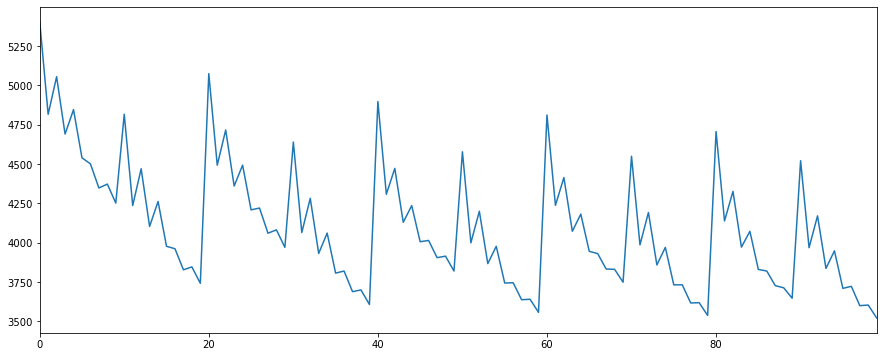

In [55]:
sarimax(df_wind,range(0,5),range(2,3),range(0,2),12)

In [56]:
arima(df_wind,(4,2,1),(4,2,1,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7192      0.025    -28.237      0.000      -0.769      -0.669
ar.L2         -0.4860      0.035    -13.985      0.000      -0.554      -0.418
ar.L3         -0.2978      0.035     -8.413      0.000      -0.367      -0.228
ar.L4         -0.1617      0.027     -5.882      0.000      -0.216      -0.108
ma.L1         -1.0000     15.270     -0.065      0.948     -30.928      28.928
ar.S.L12      -0.7748      0.033    -23.620      0.000      -0.839      -0.710
ar.S.L24      -0.5940      0.039    -15.348      0.000      -0.670      -0.518
ar.S.L36      -0.3797      0.039     -9.670      0.000      -0.457      -0.303
ar.S.L48      -0.0004      0.041     -0.010      0.992      -0.081       0.080
ma.S.L12      -0.9054      0.016    -56.143      0.000      -0.937      -0.874
sigma2        68.1307   1040.277      0.065      0.9

# Wood Energy Consumption

## Data Exploration

In [44]:
df_wood

Wood Energy Consumption
Month                              
1973-01-01                  129.630
1973-02-01                  117.194
1973-03-01                  129.763
1973-04-01                  125.462
1973-05-01                  129.624
...                             ...
2020-03-01                  179.141
2020-04-01                  173.630
2020-05-01                  182.582
2020-06-01                  169.606
2020-07-01                  176.805

[571 rows x 1 columns]

In [45]:
df_wood.isna().sum()

Wood Energy Consumption    0
dtype: int64

<AxesSubplot:xlabel='Month'>

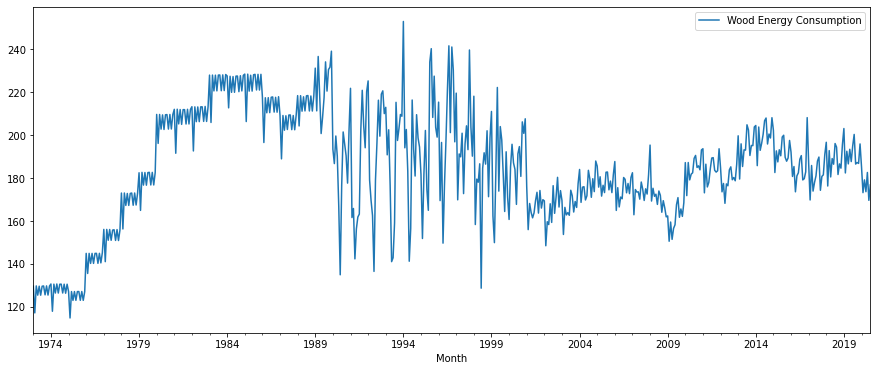

In [46]:
df_wood.plot(figsize=(15,6))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

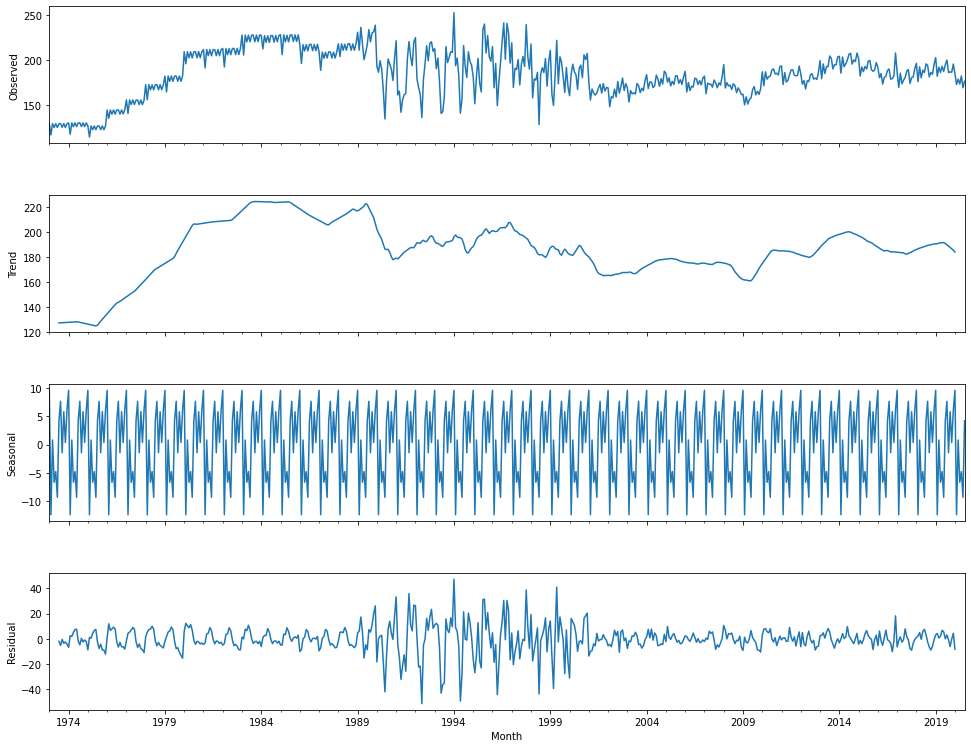

In [47]:
seasonal_decomp(df_wood['Wood Energy Consumption'])

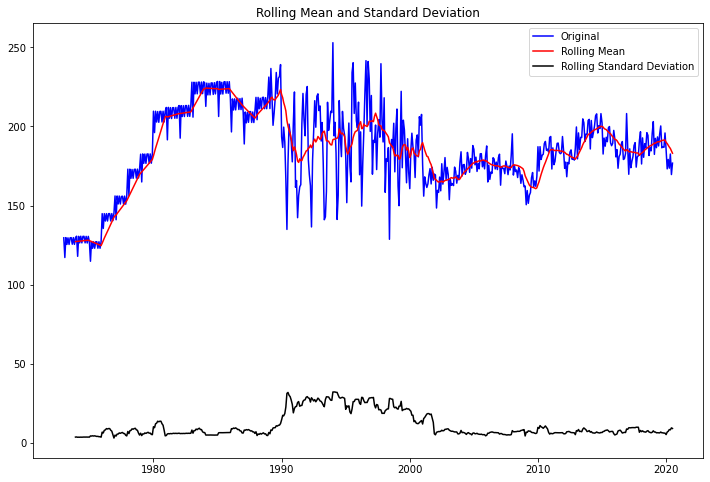

Dicky-Fuller Test:
The Series is likely Non-Stationary
Test Statistic         -2.845032
p-value                 0.052124
#Lags Used             19.000000
#Observations Used    551.000000
Critical Value 1%      -3.442274
Critical Value 5%      -2.866800
Critical Value 10%     -2.569571
dtype: float64


In [48]:
test_stationarity(df_wood['Wood Energy Consumption'],12,0.05)

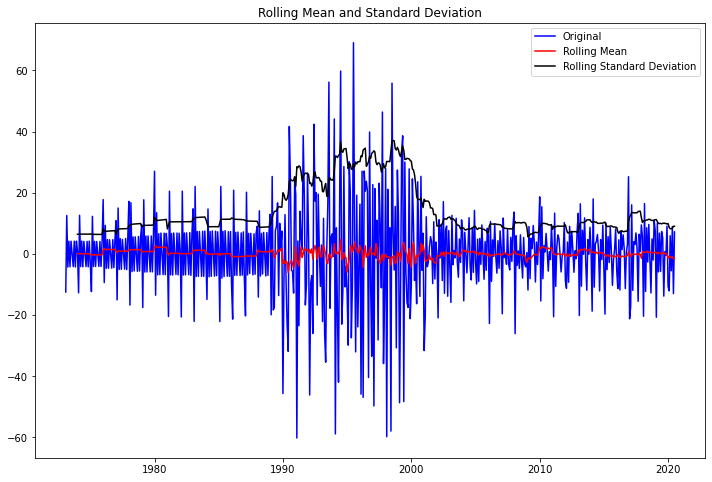

Dicky-Fuller Test:
The Series is likely Stattionary
Test Statistic         -5.598761
p-value                 0.000001
#Lags Used             18.000000
#Observations Used    551.000000
Critical Value 1%      -3.442274
Critical Value 5%      -2.866800
Critical Value 10%     -2.569571
dtype: float64


In [49]:
diff_1_wood=shift(df_wood['Wood Energy Consumption'],1)
test_stationarity(diff_1_wood,12,0.05)

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

<Figure size 432x288 with 0 Axes>

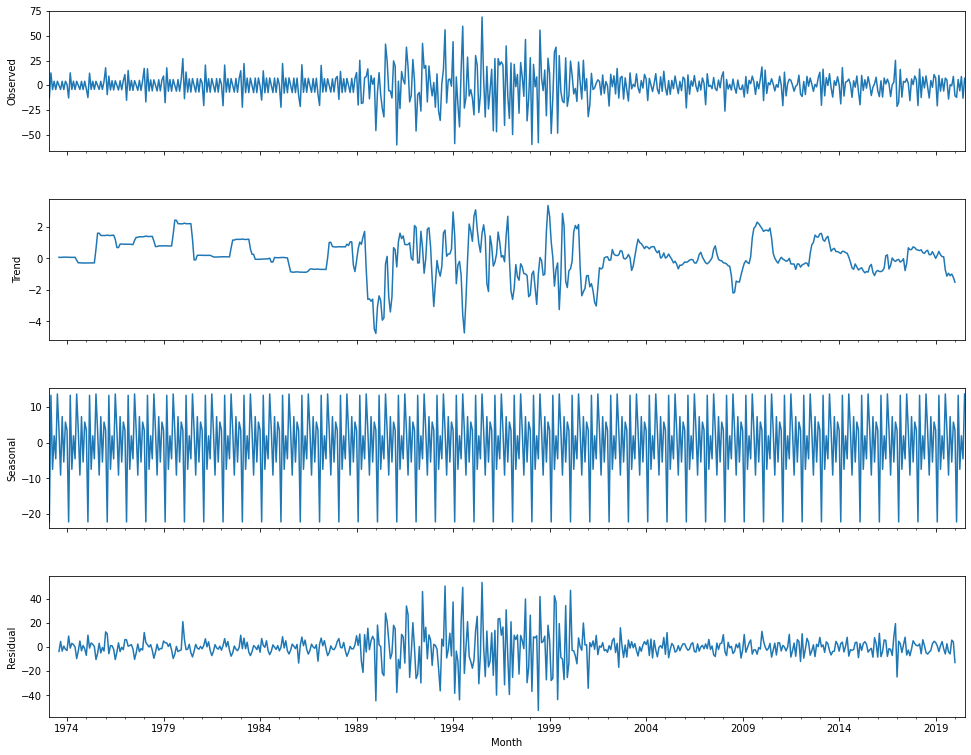

In [50]:
seasonal_decomp(diff_1_wood)

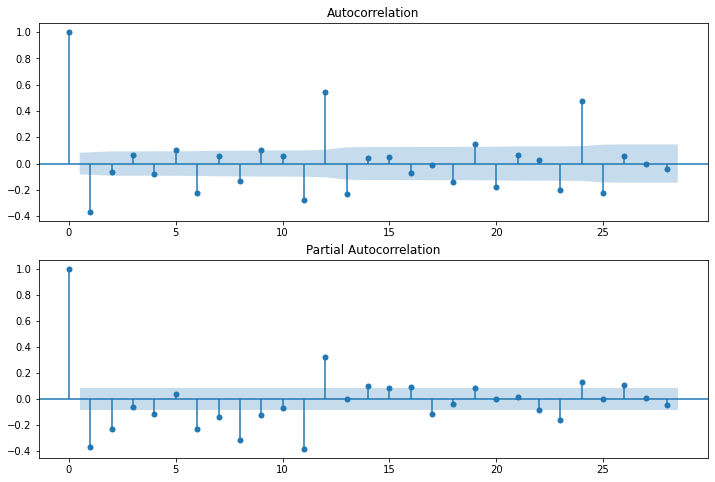

In [43]:
p_acf(diff_1_wood)

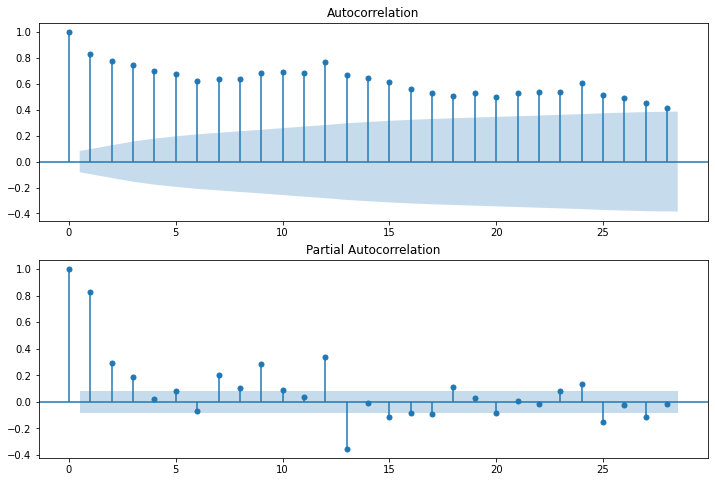

In [44]:
p_acf(df_wood['Wood Energy Consumption'])

## Base Model

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4590.700166904706
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4305.40830050938
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4402.475892061006


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4302.158113384984


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4263.329909471444


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4219.795519686635


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (3, 1, 0, 12)12 : AIC Calculated =4167.5509860226


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (3, 1, 1, 12)12 : AIC Calculated =4135.86535151862


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4491.873800378189


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4220.354785390721


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4311.2854794275045


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4222.3348061760225


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4177.267472980279


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4151.949705899017


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (3, 1, 0, 12)12 : AIC Calculated =4083.1801882852424


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (3, 1, 1, 12)12 : AIC Calculated =4064.955270461232
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4559.256114616763


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4269.067475924732


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4356.184751750912


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4271.863880998402


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4219.624231788328


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4183.6572126938245


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (3, 1, 0, 12)12 : AIC Calculated =4125.0380122406195


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (3, 1, 1, 12)12 : AIC Calculated =4096.8678889629


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4456.032921685471


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4190.916465450131


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4285.387637328464


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4191.468929105868


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4142.889141289368


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4111.724987962171


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (3, 1, 0, 12)12 : AIC Calculated =4046.7472651259386


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (3, 1, 1, 12)12 : AIC Calculated =4025.1581364625717
ARIMA (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4491.125135235514


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4224.002511447215


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4292.3656967330135


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4222.4123294685705


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4159.255404619473


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4133.5718929466875


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (3, 1, 0, 12)12 : AIC Calculated =4066.660398472656


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 0) x (3, 1, 1, 12)12 : AIC Calculated =4046.5677539086314


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4456.909395451155


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4192.759868905934


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4276.515565505162


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4194.67751986744


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4137.046999518166


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4106.197572418072


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (3, 1, 0, 12)12 : AIC Calculated =4040.7825535929223


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) x (3, 1, 1, 12)12 : AIC Calculated =4019.1048021531215
ARIMA (3, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4457.825610130553


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4216.400870521571


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4272.666367658556


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4204.670489926299


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4140.644957252127


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4118.714862476143


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (3, 1, 0, 12)12 : AIC Calculated =4048.071146549793


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 0) x (3, 1, 1, 12)12 : AIC Calculated =4029.1244883508602


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4451.632089050893


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4188.015430314517


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4254.388673626465


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4182.9128775035015


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4121.45844592455


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4095.453110061105


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (3, 1, 0, 12)12 : AIC Calculated =4027.8617195602883


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) x (3, 1, 1, 12)12 : AIC Calculated =4006.6356003329875


pdq         (3, 1, 1)
pdqs    (3, 1, 1, 12)
AIC           4006.64
Name: 63, dtype: object

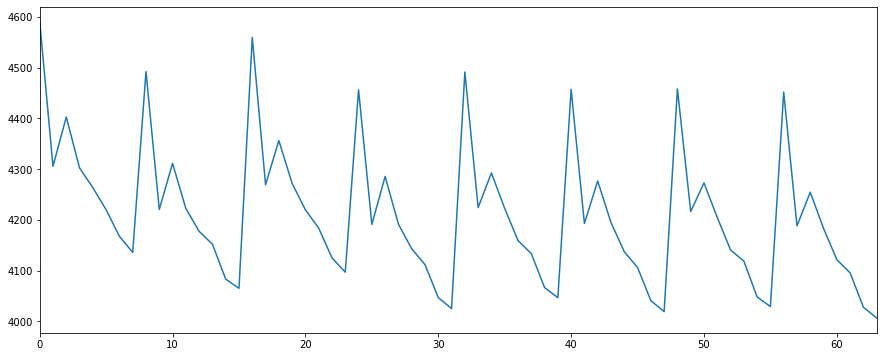

In [59]:
sarimax(df_wood,range(0,4),range(1,2),range(0,2),12)

In [60]:
arima(df_wood,(3,1,1),(3,1,1,12))

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5008      0.041     12.293      0.000       0.421       0.581
ar.L2         -0.0557      0.036     -1.547      0.122      -0.126       0.015
ar.L3          0.1386      0.034      4.130      0.000       0.073       0.204
ma.L1         -0.9225      0.026    -35.202      0.000      -0.974      -0.871
ar.S.L12       0.2664      0.038      7.049      0.000       0.192       0.340
ar.S.L24       0.0744      0.039      1.890      0.059      -0.003       0.151
ar.S.L36       0.1191      0.044      2.716      0.007       0.033       0.205
ma.S.L12      -1.0000    311.440     -0.003      0.997    -611.412     609.412
sigma2       116.9780   3.64e+04      0.003      0.997   -7.13e+04    7.15e+04
